In [1]:
import numpy as np #manipulação de matrizes das imagens
import glob #agrupamento de arquivos
import matplotlib.pyplot as plt #imprime gráficos
import cv2 #openCV

In [2]:
pequeno = 'C:/Users/Edvaldo Pereira/Documents/GitHub/Projeto Final Processamento de imagens/archive/NODULOS PEQUENOS/*'
listaArquivos_pequeno = glob.glob(pequeno)
                          
grande = 'C:/Users/Edvaldo Pereira/Documents/GitHub/Processamento-de-Imagens/Projeto Final Processamento de imagens/NODULOS GRANDES*'
listaArquivos_grande = glob.glob(grande)                      
    
normal = 'C:/Users/Edvaldo Pereira/Documents/GitHub/Projeto Final Processamento de imagens/archive/all-mias/*'
listaArquivos_normal = glob.glob(normal)

In [3]:
listaArquivos_pequeno

[]

In [4]:
listaArquivos_grande

[]

In [5]:
listaArquivos_normal

[]

In [6]:
#Função para imprimir imagem:

def imprimeImagem(imgImprimir:np, title):
    dpi = plt.rcParams['figure.dpi']
    height, width = imgImprimir.shape
    figsize = width / float(dpi), height / float(dpi)
    
    fig = plt.figure(figsize=figsize)
    
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    ax.imshow(imgImprimir,'gray')

    plt.show()

In [7]:
def imprimeImagemV(imgsArray, titlesArray, size, x, y):
    if(x < 1 or y < 1):
        print("Valores incorretos de X e Y (precisam ser maiores que 0)")
        return
    elif(x == 1 and y == 1):
        ImprimeImagem(imgsArray[0], titlesArray[0])
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, 'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 22, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, 'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 22, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 22, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, 'gray')
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

In [8]:
#Função para aumentar o contraste, para aumentar a chance de encontrar nódulo

def aumentaContraste(imagemC,contraste,brilho):
    retorno = np.zeros(imagemC.shape)
    alpha = contraste # Contrast control (1.0-3.0)
    beta = brilho # Brightness control (0-100)

    retorno = cv2.convertScaleAbs(imagemC, alpha=alpha, beta=beta)

    #imprimeImagem(retorno,"Contraste Modificado",(20,20))
    return retorno

In [9]:
#Função para imprimir o histograma
def imprimeHistograma(imgHist,titulo):
    plot = cv2.calcHist([imgHist], [0],None,[256],[0,256])
    plt.hist(imgHist.ravel(),256,[0,256])
    plt.rcParams["figure.figsize"] = (15,10)
    plt.title(titulo,fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()

In [10]:
#Função para circular o nod
def circulaNod(imgNod,nodSize,x,y):

    center_coordinates = (x-187, 1024-y)
    radius = nodSize
    color = (0, 0, 0)
    thickness = 2

    imgNod = cv2.circle(imgNod, center_coordinates, radius, color, thickness)
    
    return imgNod

In [11]:
#Função para posterizar a imagem
def posteriza(imgpos,n):
    indices = np.arange(0,256)   
    divider = np.linspace(0,255,n+1)[1] 
    quantiz = np.int0(np.linspace(0,255,n)) 
    color_levels = np.clip(np.int0(indices/divider),0,n-1) 
    palette = quantiz[color_levels] 
    im2 = palette[imgpos]  
    im2 = cv2.convertScaleAbs(im2) 
    
    return im2

In [12]:
def erosao(imgErosao,n,vezes):
    kernel = np.ones((n, n), np.uint8)
    erudido = cv2.erode(opening, kernel,iterations=vezes)
    return erudido

def dilatacao(imgDilatacao,n,vezes):
    kernel = np.ones((n,n),np.uint8)
    dilation = cv2.dilate(imgDilatacao,kernel,iterations = vezes)
    return dilation

def abertura(imgAbertura,n,vezes):
    kernel = np.ones((n,n),np.uint8)
    opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel,iterations=vezes)
    return opening


In [13]:
def preenche(imgPreenche,n):
    
    # Limiarização.
    # fazendo limiarização acima de n para 0.
    # abaixo de n para 255.

    th, im_th = cv2.threshold(imgPreenche, n, 255, cv2.THRESH_BINARY);

    # copiando limiarização.
    im_floodfill = im_th.copy()

    #maskara
    h, w = im_th.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 255);

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    im_out = im_th | im_floodfill_inv
    
    return im_out


In [14]:
def circula(imgCircula,tamanhobloco,C):
    imgGauss = cv2.adaptiveThreshold(imgCircula, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, tamanhobloco, C)
    return imgGauss


In [15]:
def pos2canais(img2canais):
    imgpos = img2canais.copy()
    valor = 255 - imgpos.mean()
    imgpos[imgpos >= valor]= 255
    imgpos[imgpos < valor] = 0
    return imgpos

In [16]:
def Listacontornos(imgcontorno):
    contorno, hierarchy = cv2.findContours(imgcontorno, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    return contorno

In [17]:
#Calculando o corte em X
i=0
while img[0][i] == 0:
    i += 1
print(i)

NameError: name 'img' is not defined

In [18]:
#Abre a imagem original
caminho = listaArquivos_pequeno[1]
img = cv2.imread(caminho)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imprimeImagem(img, "Abrindo a Imagem original")

IndexError: list index out of range

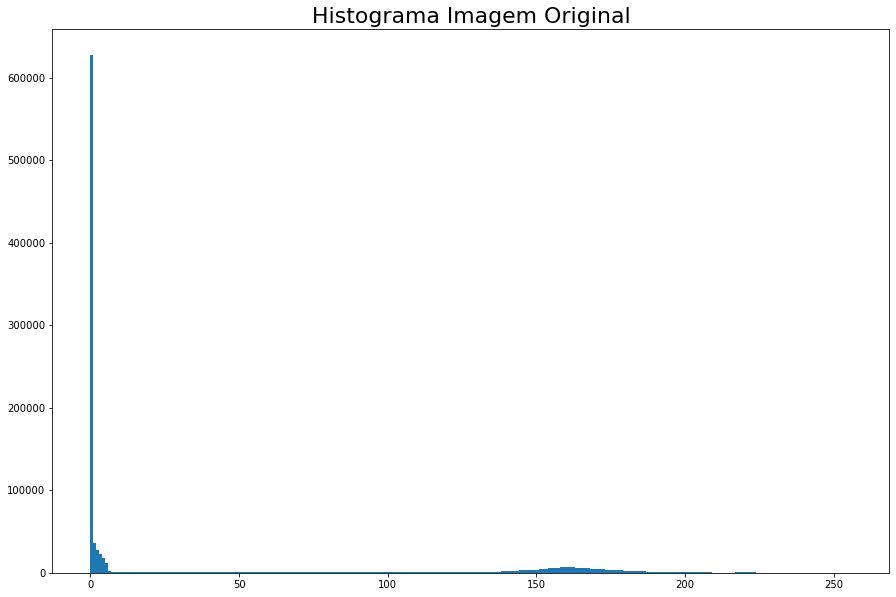

In [338]:
#Imprime o histograma
imprimeHistograma(img,'Histograma Imagem Original')

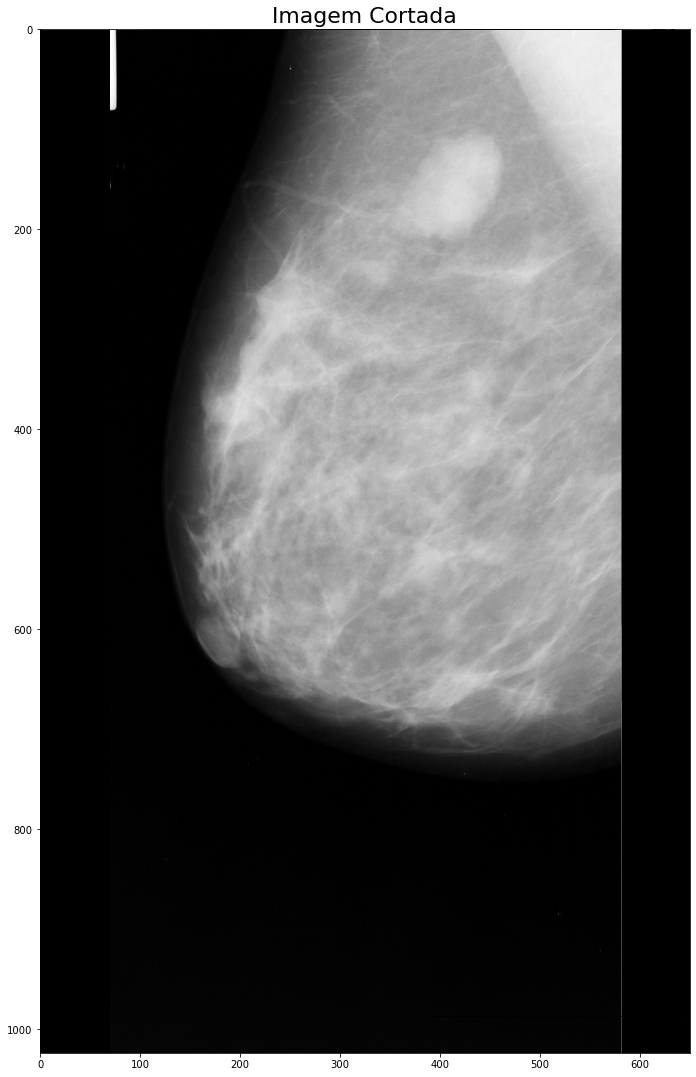

In [339]:
#Cortando a img apenas em X
img = img[0:1024,187:837]
imprimeImagem(img,'Imagem Cortada')

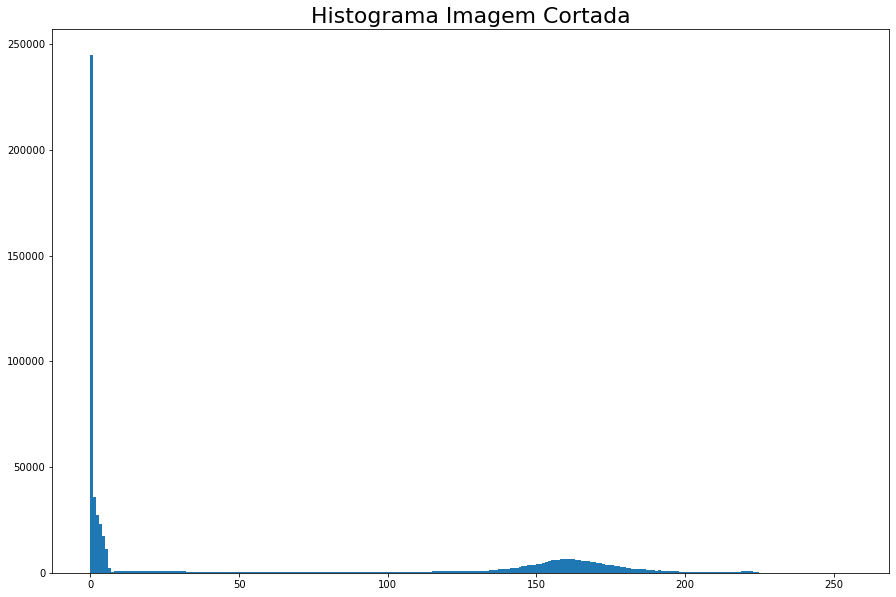

In [340]:
#Imprime o histograma
imprimeHistograma(img,'Histograma Imagem Cortada')

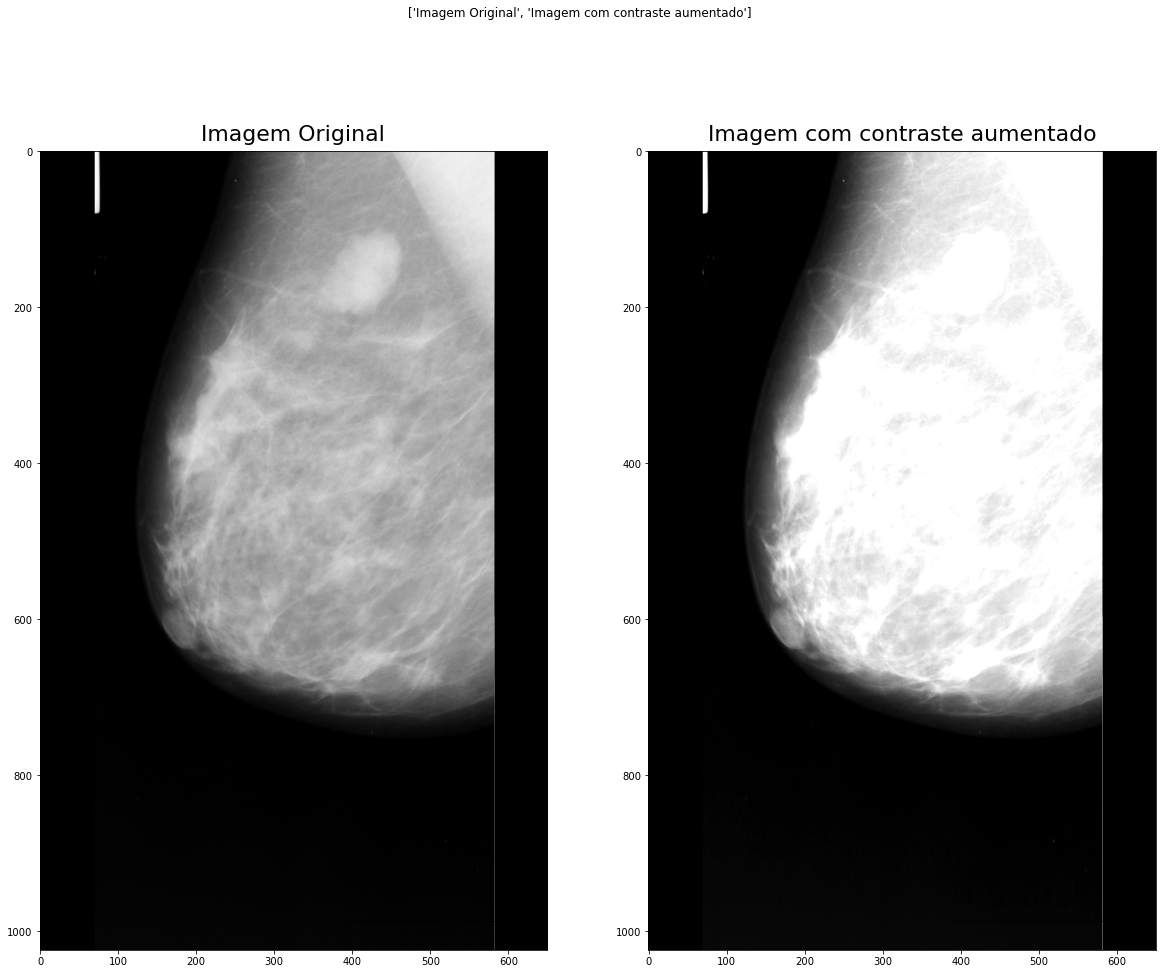

In [341]:
# Aumenta o Contraste
imprimir = []
titulos = []

imprimir.append(img)
titulos.append('Imagem Original')

aumentoContraste = aumentaContraste(img,1.2,60)
imprimir.append(aumentoContraste)
titulos.append('Imagem com contraste aumentado')

imprimeImagemV(imprimir,titulos,(20,20),2,1)


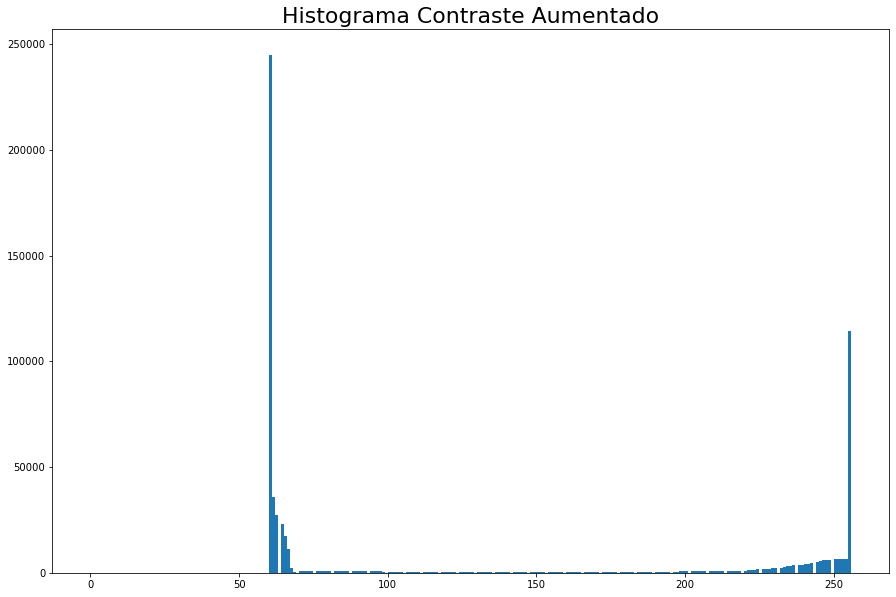

In [342]:
imprimeHistograma(aumentoContraste,'Histograma Contraste Aumentado')

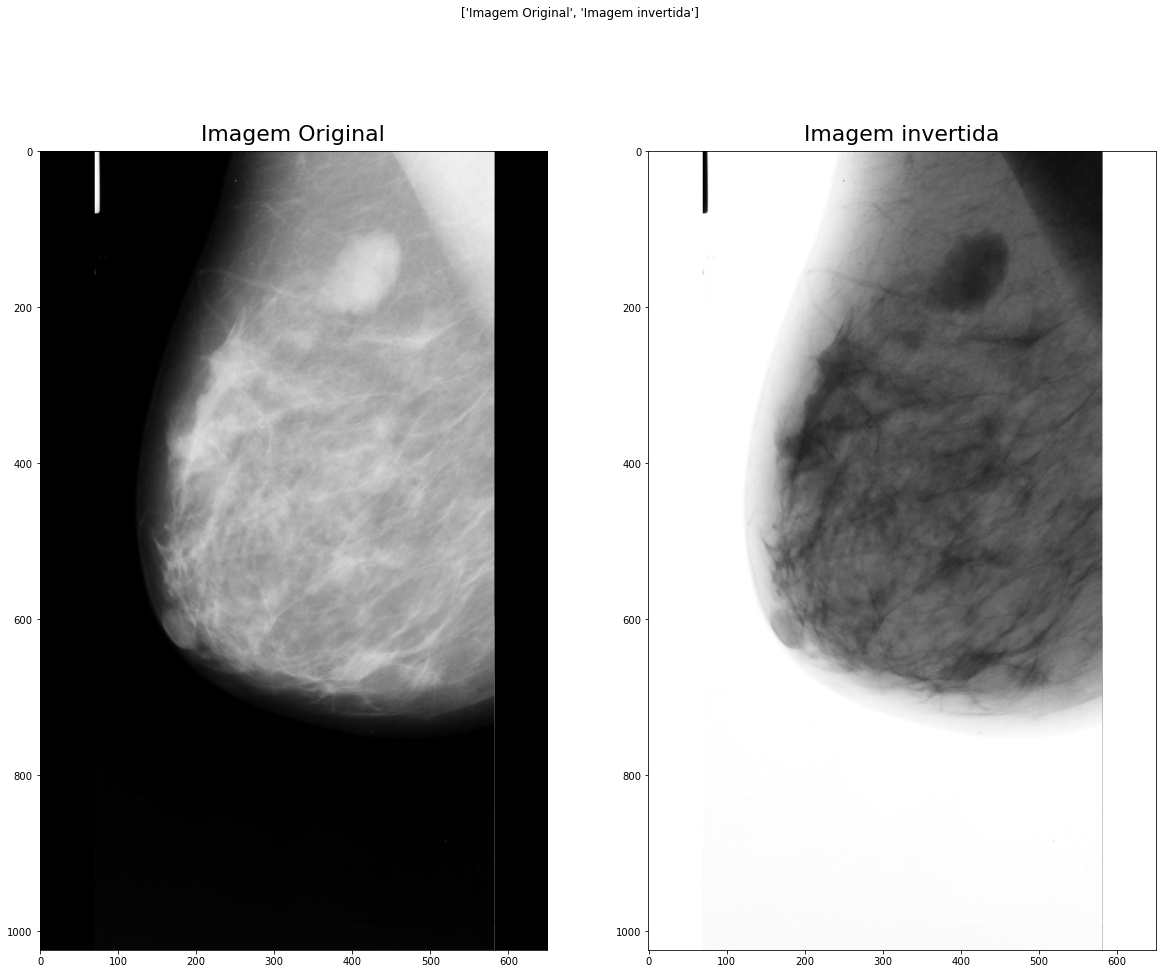

In [343]:
# Comparação com invertida
imprimir = []
titulos = []

imprimir.append(img)
titulos.append('Imagem Original')

invertido = cv2.bitwise_not(img)
imprimir.append(invertido)
titulos.append('Imagem invertida')

imprimeImagemV(imprimir,titulos,(20,20),2,1)

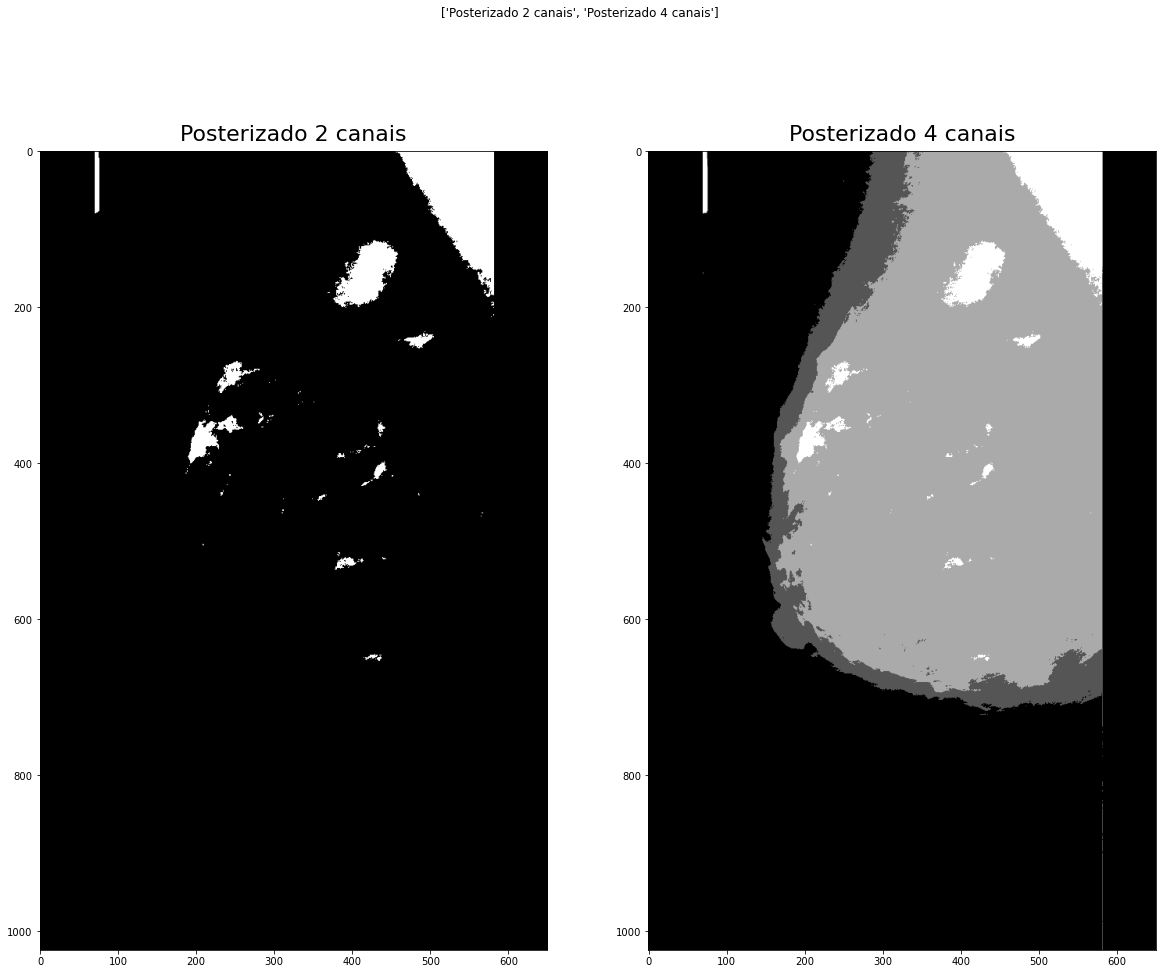

In [344]:
# Posterização simples (2 canais)
imprimir = []
titulos = []

imgpos = pos2canais(img)
imprimir.append(imgpos)
titulos.append('Posterizado 2 canais')

n=4
imgpos2 = posteriza(img,n)
imprimir.append(imgpos2)
canais = 'Posterizado '+str(n)+' canais'
titulos.append(canais)

imprimeImagemV(imprimir,titulos,(20,20),2,1)

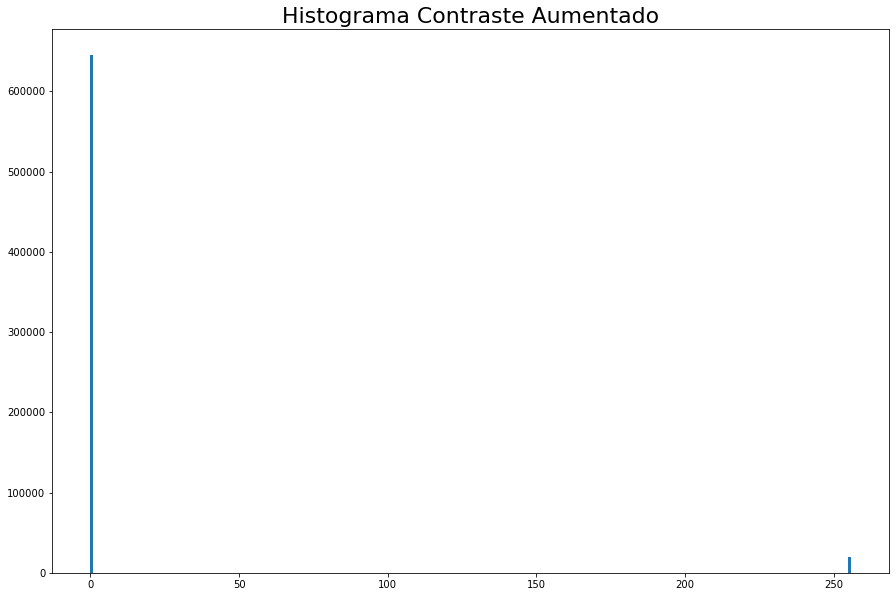

In [345]:
imprimeHistograma(imgpos,'Histograma Contraste Aumentado')

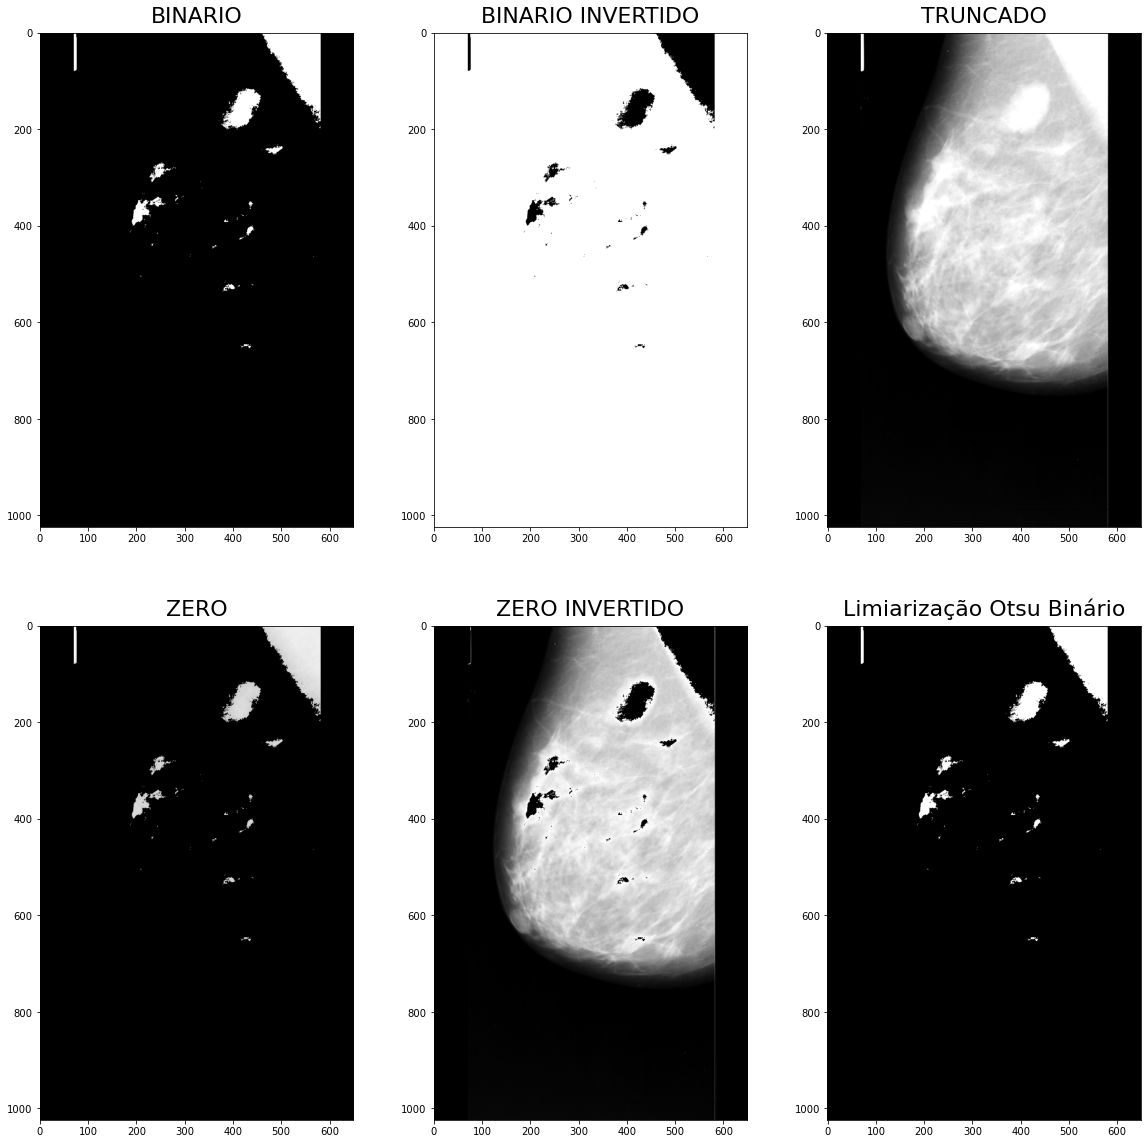

In [346]:
imprimir = []
titulos = []

media = 255 - int(img.mean())

ret,thresh1 = cv2.threshold(img, media,255,cv2.THRESH_BINARY)
imprimir.append(thresh1)

ret,thresh2 = cv2.threshold(img,media,255,cv2.THRESH_BINARY_INV)
imprimir.append(thresh2)

ret,thresh3 = cv2.threshold(img,media,255,cv2.THRESH_TRUNC)
imprimir.append(thresh3)

ret,thresh4 = cv2.threshold(img,media,255,cv2.THRESH_TOZERO)
imprimir.append(thresh4)

ret,thresh5 = cv2.threshold(img,media,255,cv2.THRESH_TOZERO_INV)
imprimir.append(thresh5)

aux,otsu = cv2.threshold(thresh1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imprimir.append(otsu)

titulos = ['BINARIO','BINARIO INVERTIDO','TRUNCADO','ZERO','ZERO INVERTIDO','Limiarização Otsu Binário']
imprimeImagemV(imprimir,titulos,(20,20),3,2)

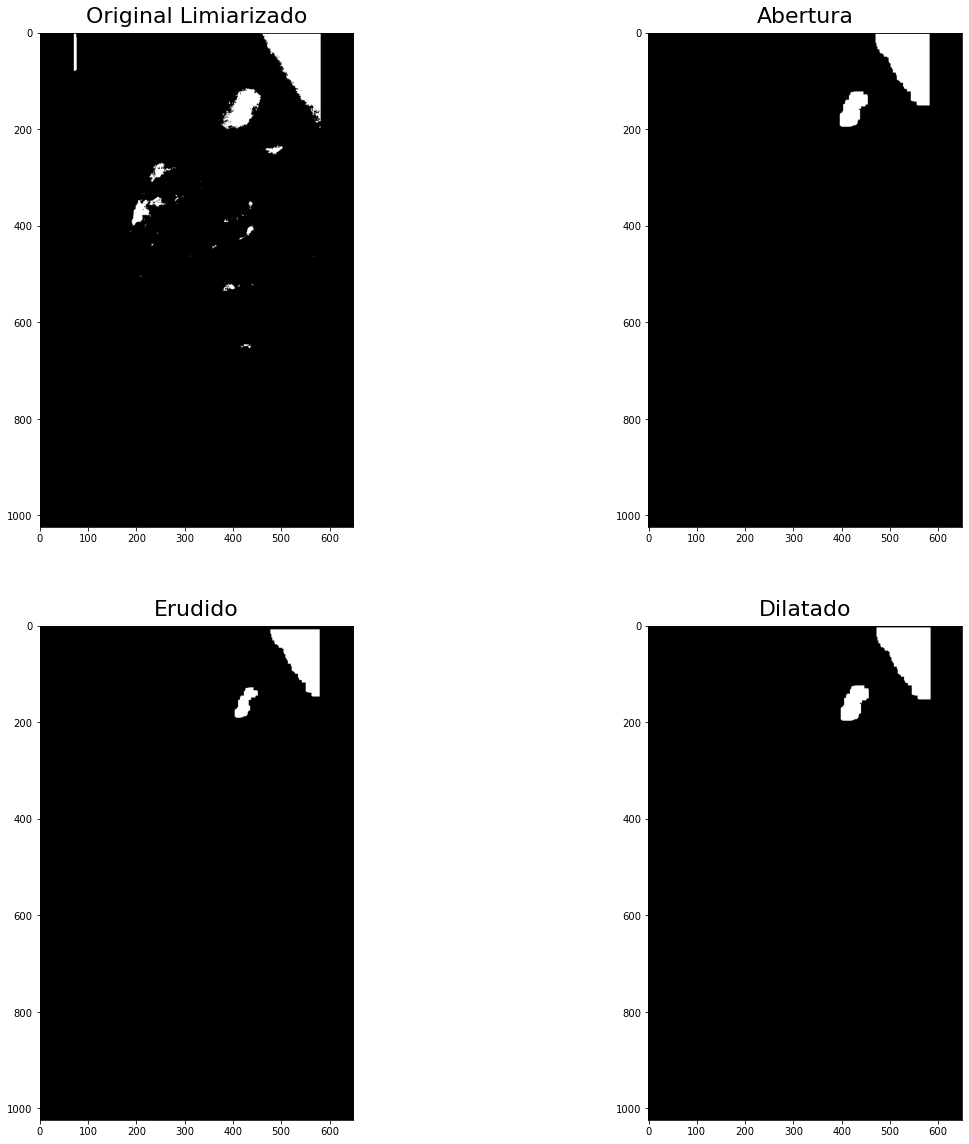

In [347]:
imprimir = []
titulos = []

imprimir.append(thresh1)

opening = abertura(thresh1,10,2)
imprimir.append(opening)

erudido = erosao(opening,6,2)
imprimir.append(erudido)

dilation = dilatacao(erudido,6,2)
imprimir.append(dilation)

titulos = ['Original Limiarizado','Abertura','Erudido','Dilatado']
imprimeImagemV(imprimir,titulos,(20,20),2,2)


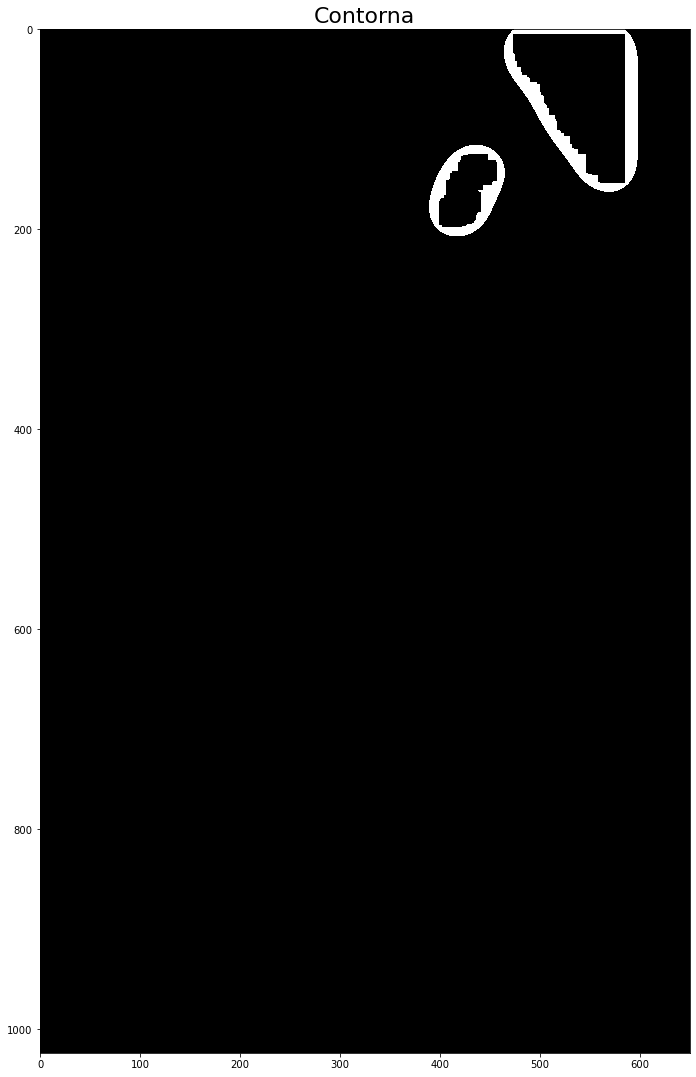

In [348]:
imgCircula = circula(dilation,101,50)
imprimeImagem(imgCircula,"Contorna")


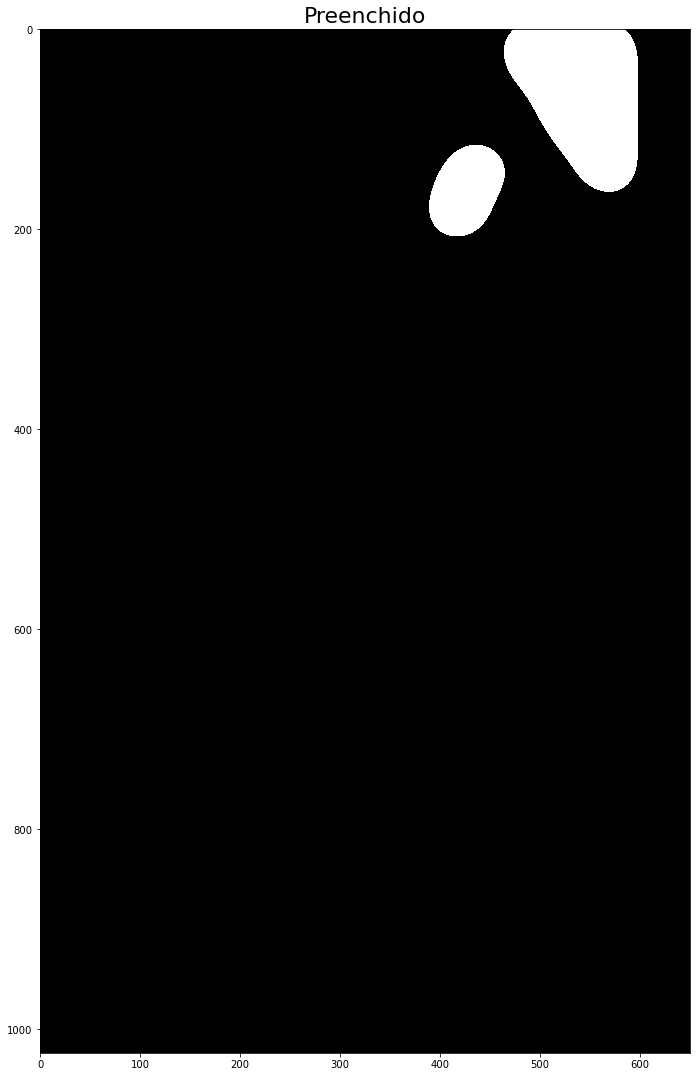

In [349]:
imgPreenchida = preenche(imgCircula,220)
imprimeImagem(imgPreenchida,'Preenchido')

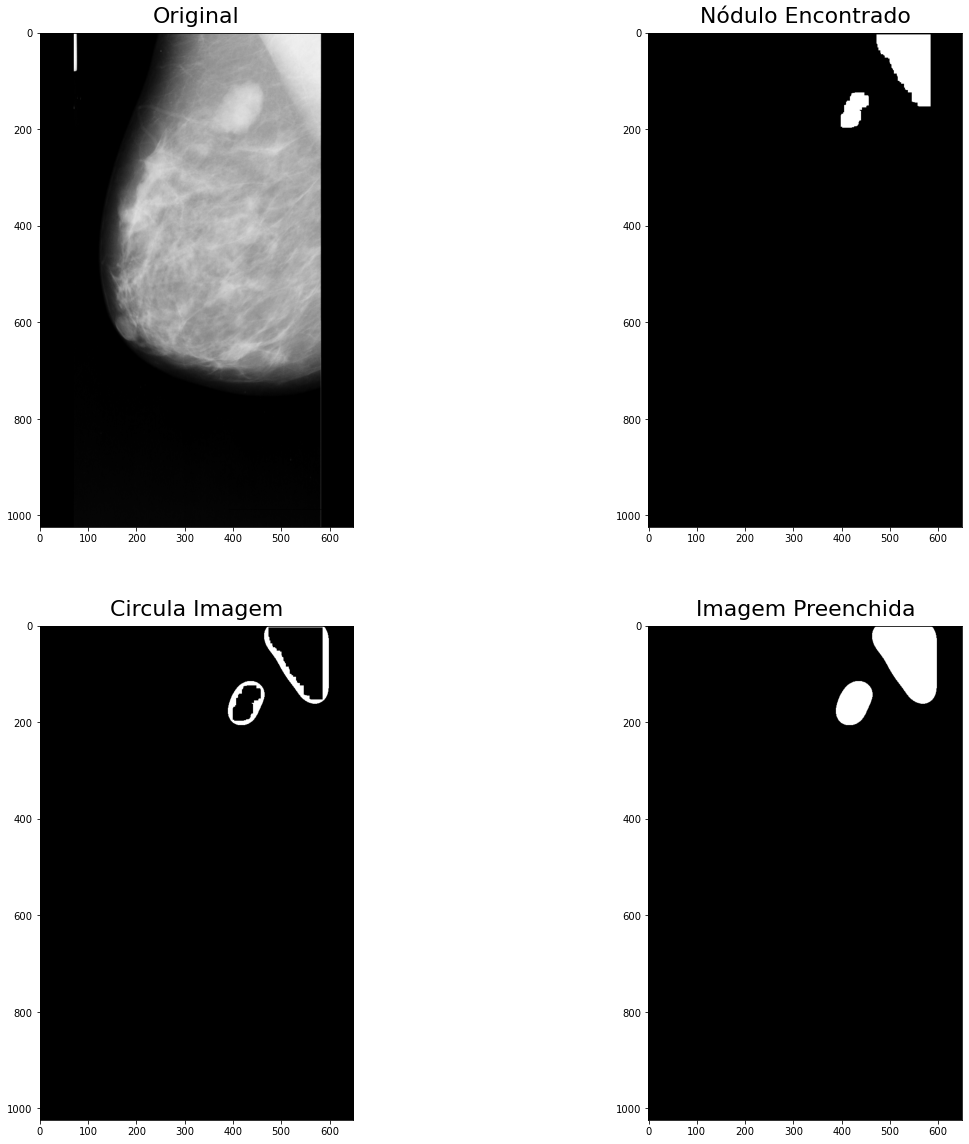

In [350]:
imprimir = []
titulos = []


imprimir.append(img)
imprimir.append(dilation)
imprimir.append(imgCircula)
imprimir.append(imgPreenchida)

titulos = ['Original','Nódulo Encontrado','Circula Imagem','Imagem Preenchida']
imprimeImagemV(imprimir,titulos,(20,20),2,2)

In [351]:
#Calculando tamanho dos nódulos com imagem dilatada e imagem preenchida 

aread = []
contorno = Listacontornos(dilation)

areac = []
contorno2 = Listacontornos(imgPreenchida)

for i in range(len(contorno)):
    aread.append(cv2.contourArea(contorno[i]))
    
for i in range(len(contorno2)):
    areac.append(cv2.contourArea(contorno2[i]))

print('Tamanho do nódulo sobre Imagem Dilatada :',min(aread))
print('Tamanho do nódulo sobre Imagem Preenchida:',min(areac))

Tamanho do nódulo sobre Imagem Dilatada : 2675.0
Tamanho do nódulo sobre Imagem Preenchida: 5003.0


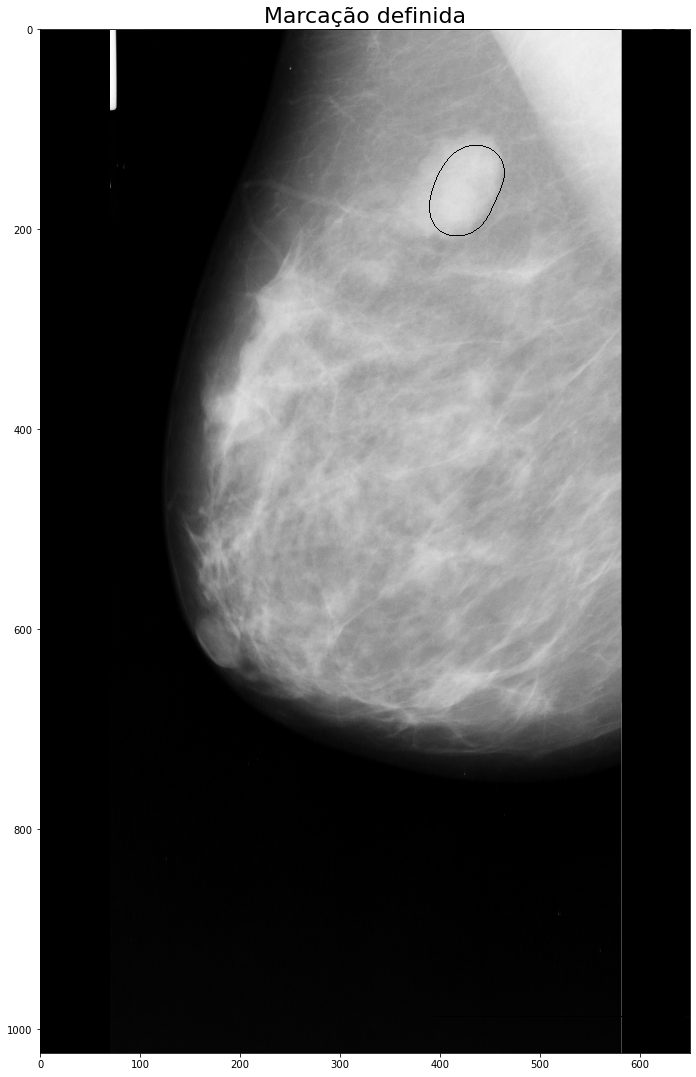

In [352]:
circuladoimg = img.copy()
pts = contorno2[0].reshape((-1,1,2))
circuladoimg = cv2.polylines(circuladoimg,[pts],True,(0,0,0))

imprimeImagem(circuladoimg,'Marcação definida')

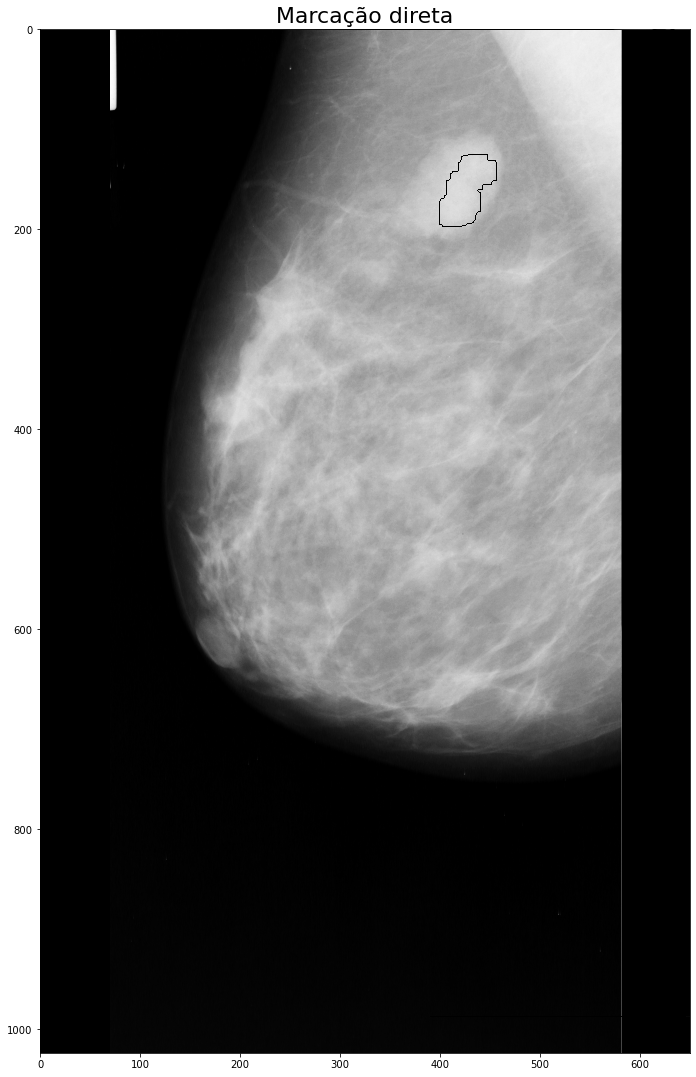

In [353]:
circuladoimg2 = img.copy()
pts = contorno[0].reshape((-1,1,2))
circuladoimg2 = cv2.polylines(circuladoimg2,[pts],True,(0,0,0))

#sobre = imgCircula + img
imprimeImagem(circuladoimg2,'Marcação direta')

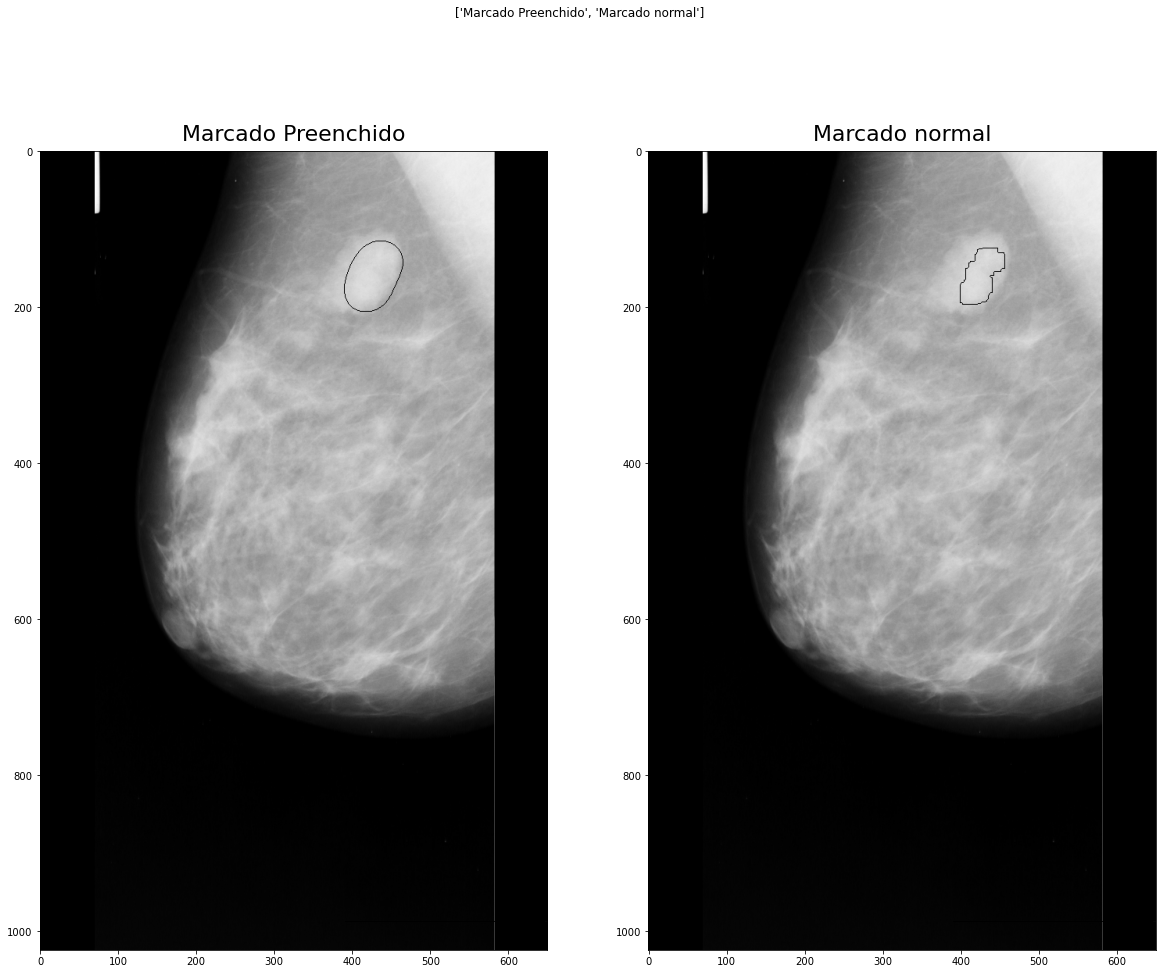

In [354]:
imprimir = []
titulos = []


imprimir.append(circuladoimg)
imprimir.append(circuladoimg2)

titulos = ['Marcado Preenchido','Marcado normal']
imprimeImagemV(imprimir,titulos,(20,20),2,1)

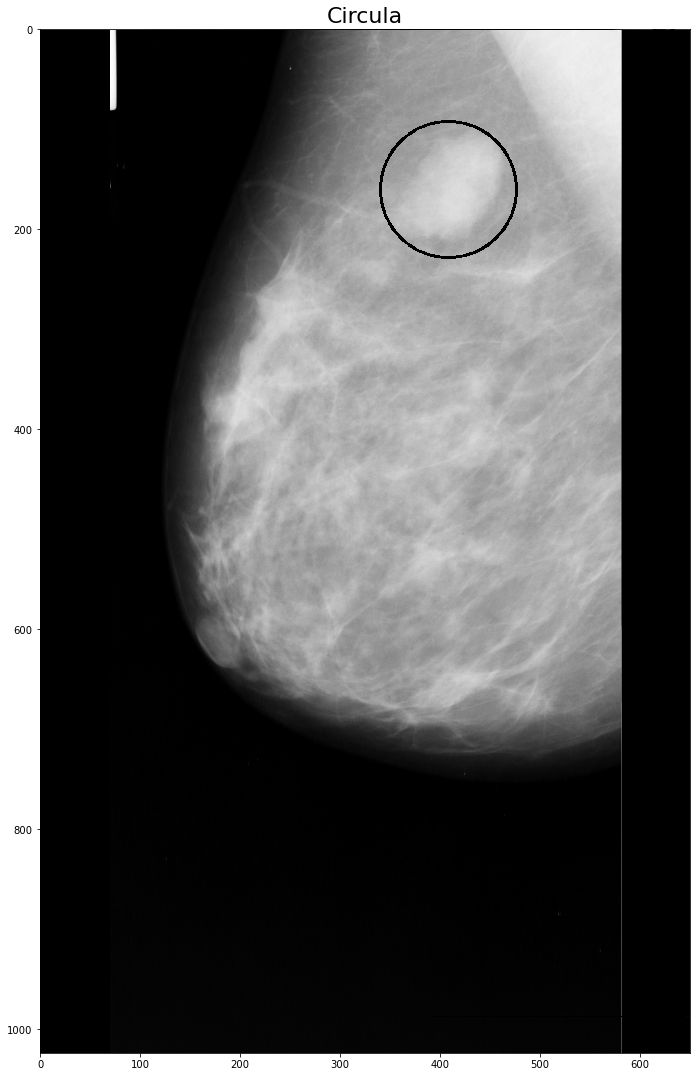

In [358]:
teste = img.copy()
teste = circulaNod(teste,68,595,864)
imprimeImagem(teste,'Circula')

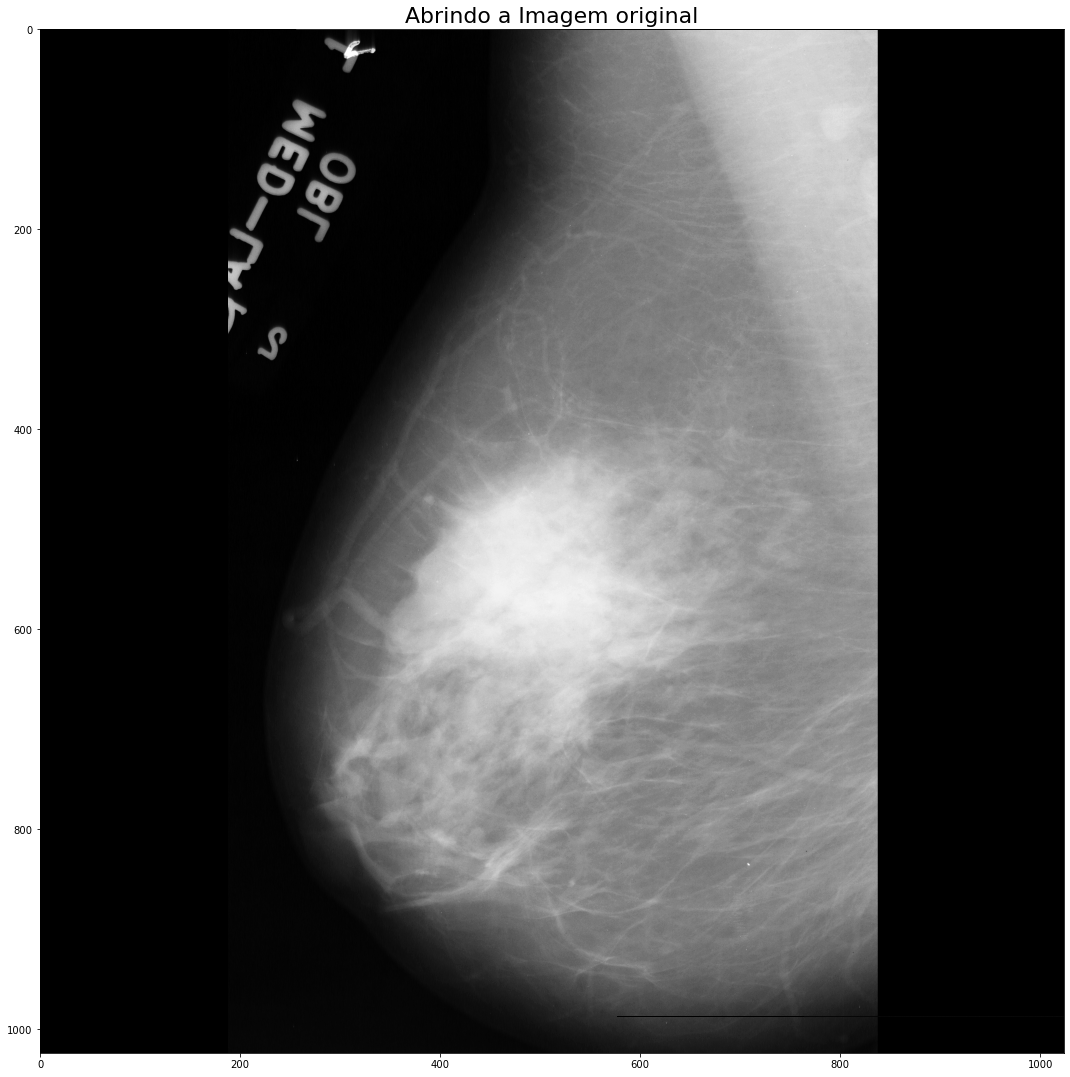

In [359]:
#Abre a imagem original nódulo grande
#caminho = listaArquivos_pequeno[1]
caminho = listaArquivos_grande[1]
img = cv2.imread(caminho)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imprimeImagem(img, "Abrindo a Imagem original")

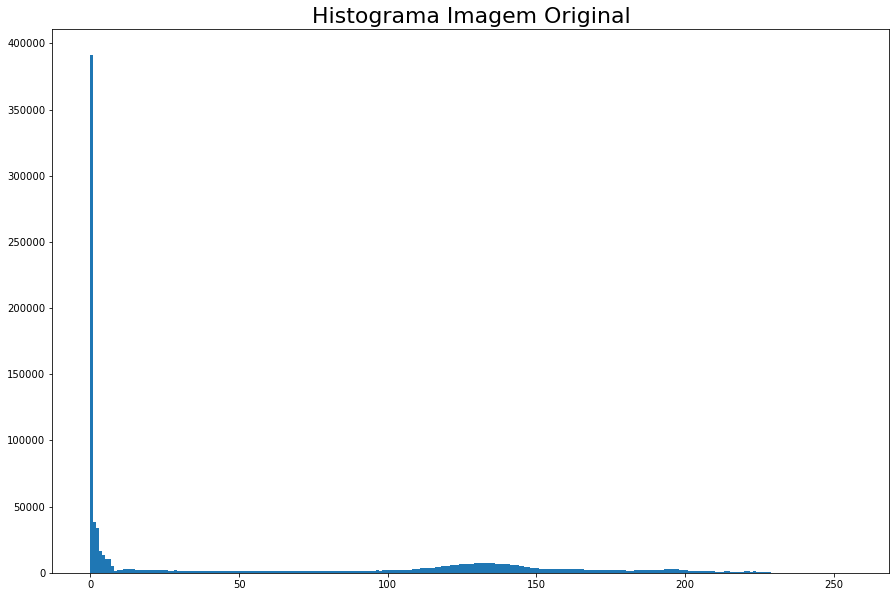

In [360]:
#Imprime o histograma
imprimeHistograma(img,'Histograma Imagem Original')

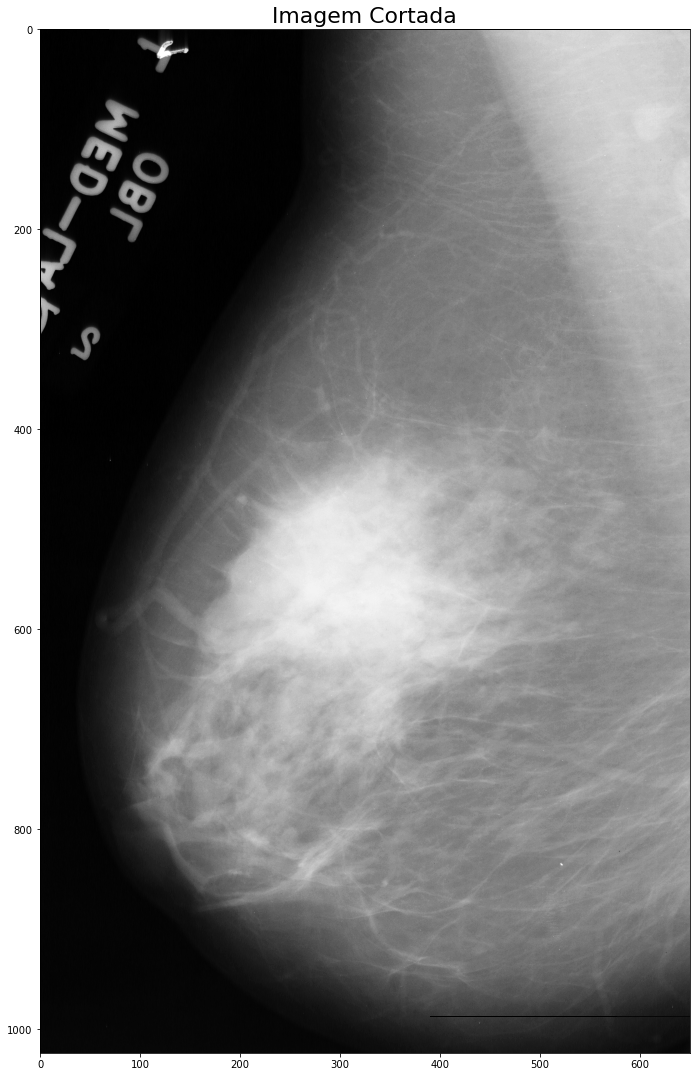

In [361]:
#Cortando a img apenas em X
img = img[0:1024,187:837]
imprimeImagem(img,'Imagem Cortada')

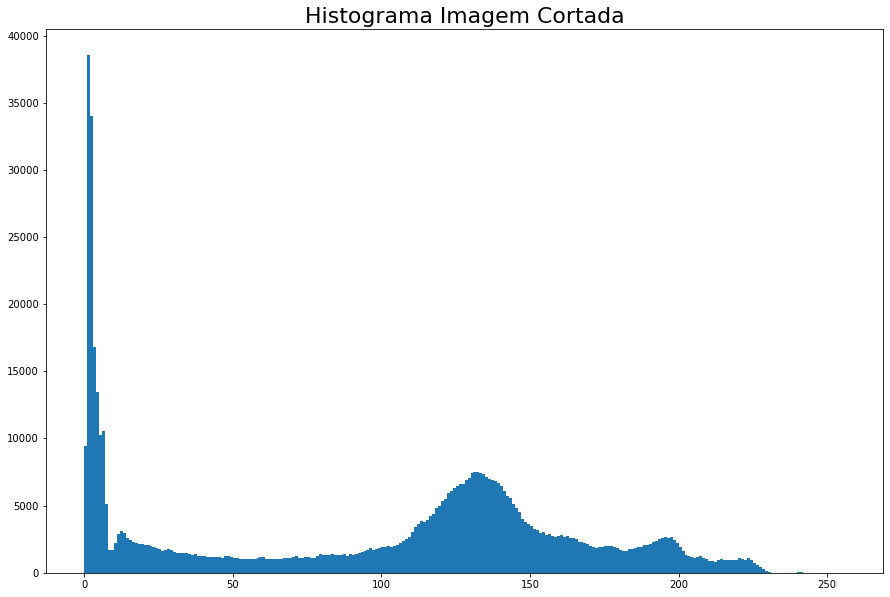

In [362]:
#Imprime o histograma
imprimeHistograma(img,'Histograma Imagem Cortada')

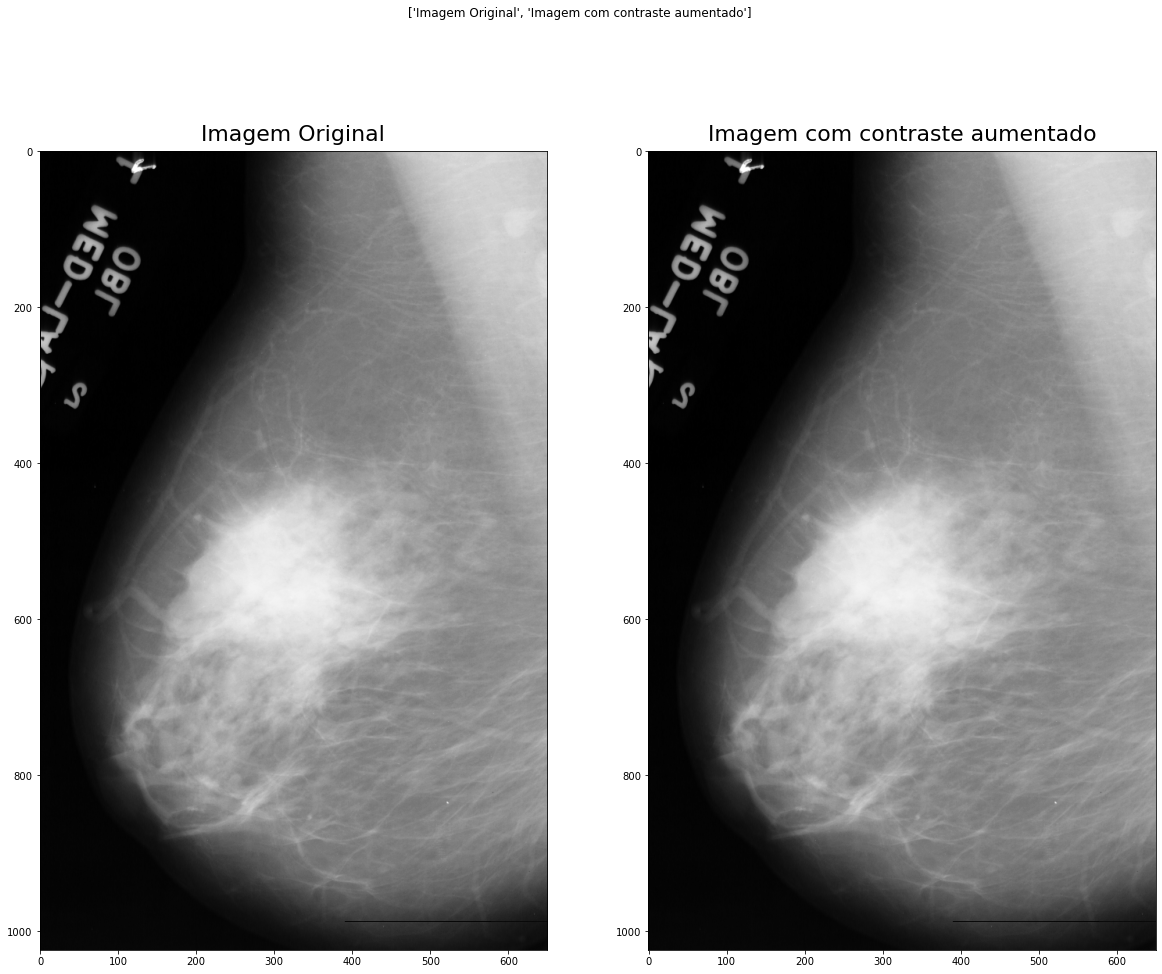

In [374]:
# Aumenta o Contraste
imprimir = []
titulos = []

imprimir.append(img)
titulos.append('Imagem Original')

aumentoContraste = aumentaContraste(img,1,0)
imprimir.append(aumentoContraste)
titulos.append('Imagem com contraste aumentado')

imprimeImagemV(imprimir,titulos,(20,20),2,1)


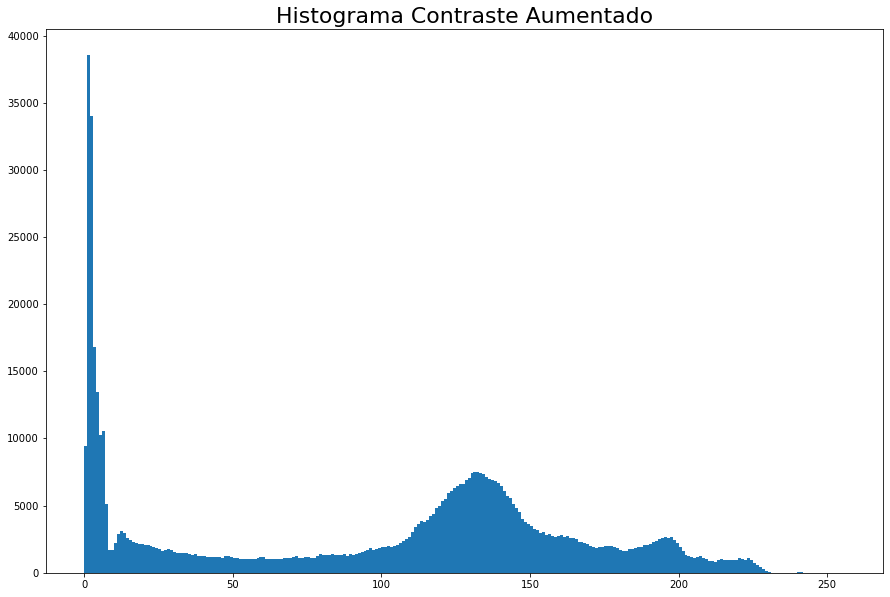

In [375]:
imprimeHistograma(aumentoContraste,'Histograma Contraste Aumentado')

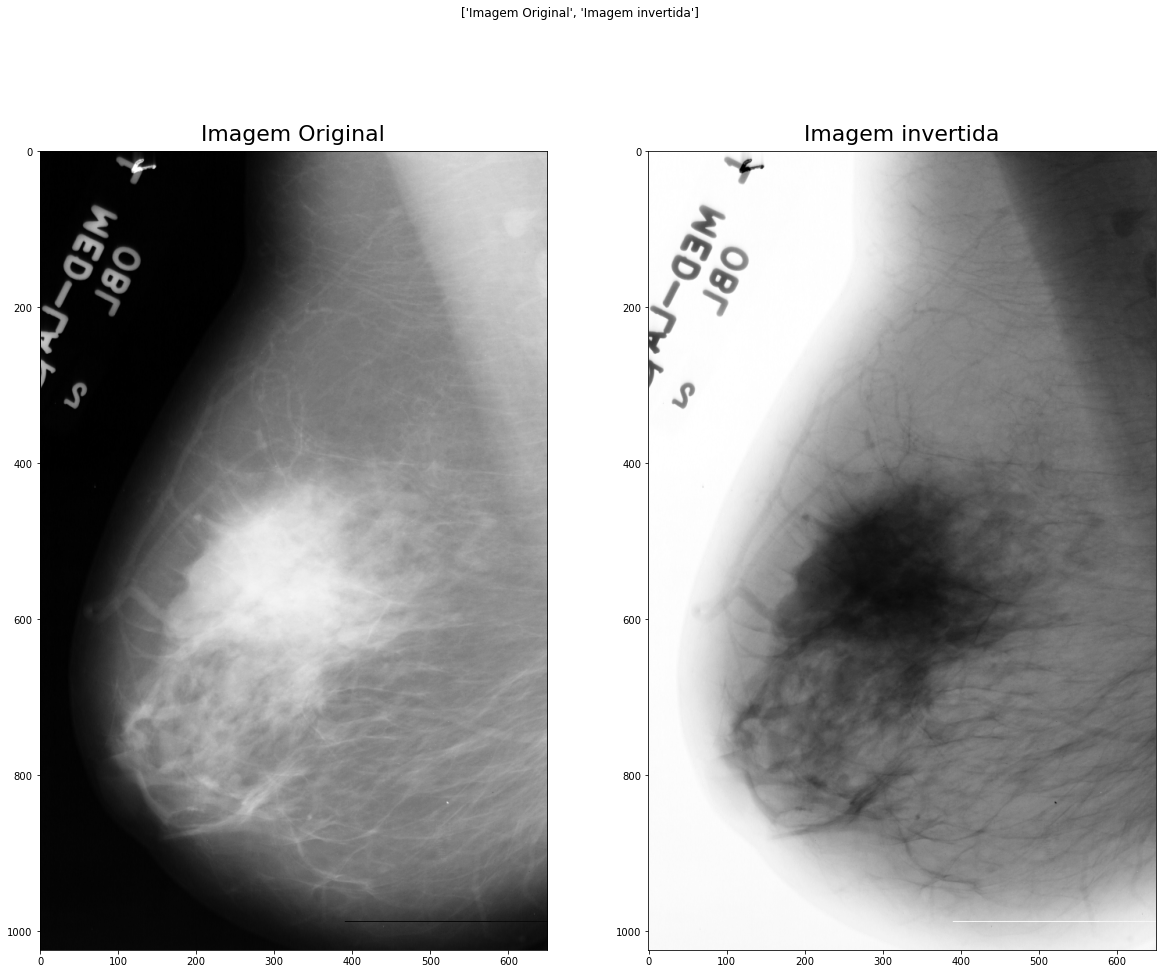

In [376]:
# Comparação com invertida
imprimir = []
titulos = []

imprimir.append(img)
titulos.append('Imagem Original')

invertido = cv2.bitwise_not(img)
imprimir.append(invertido)
titulos.append('Imagem invertida')

imprimeImagemV(imprimir,titulos,(20,20),2,1)

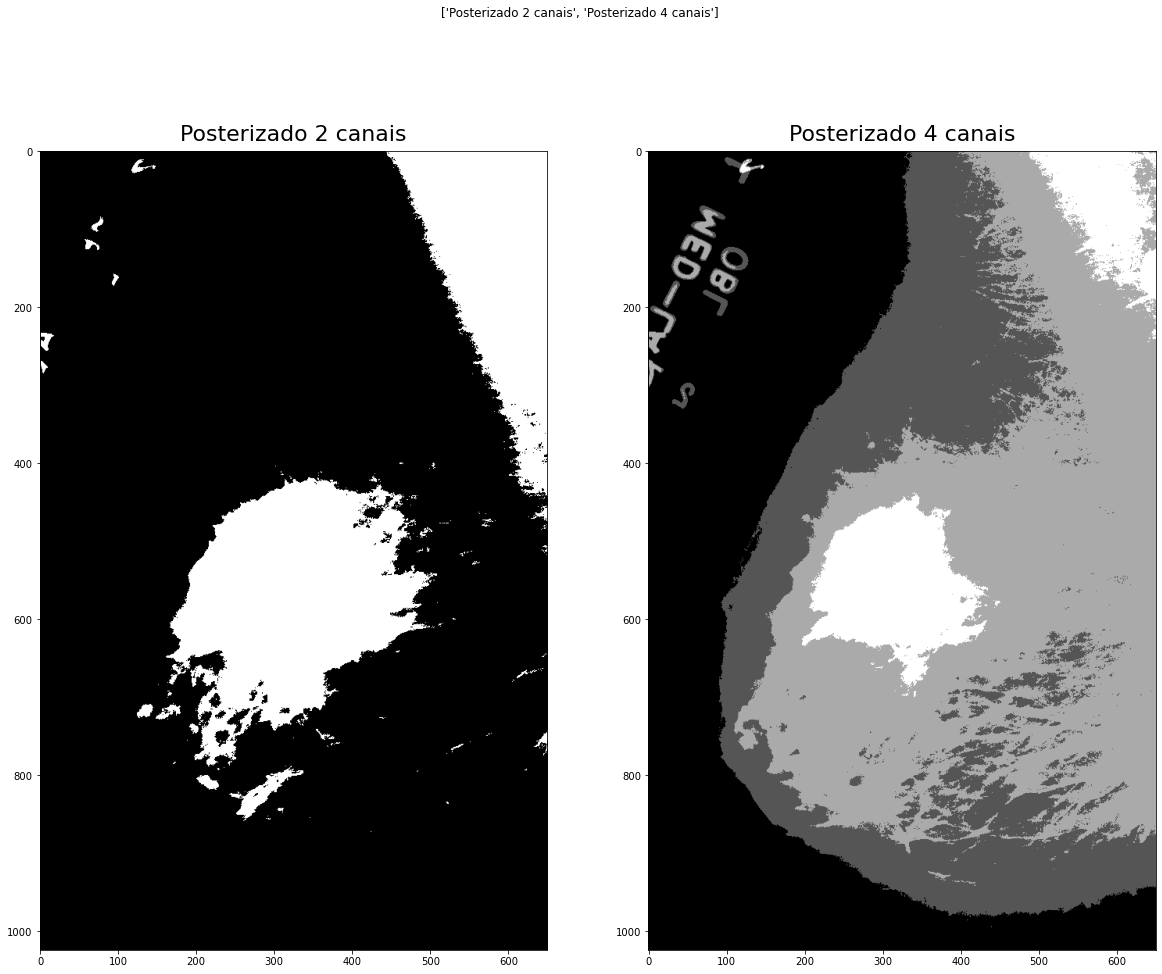

In [377]:
# Posterização simples (2 canais)
imprimir = []
titulos = []

imgpos = pos2canais(aumentoContraste)
imprimir.append(imgpos)
titulos.append('Posterizado 2 canais')

n=4
imgpos2 = posteriza(img,n)
imprimir.append(imgpos2)
canais = 'Posterizado '+str(n)+' canais'
titulos.append(canais)

imprimeImagemV(imprimir,titulos,(20,20),2,1)

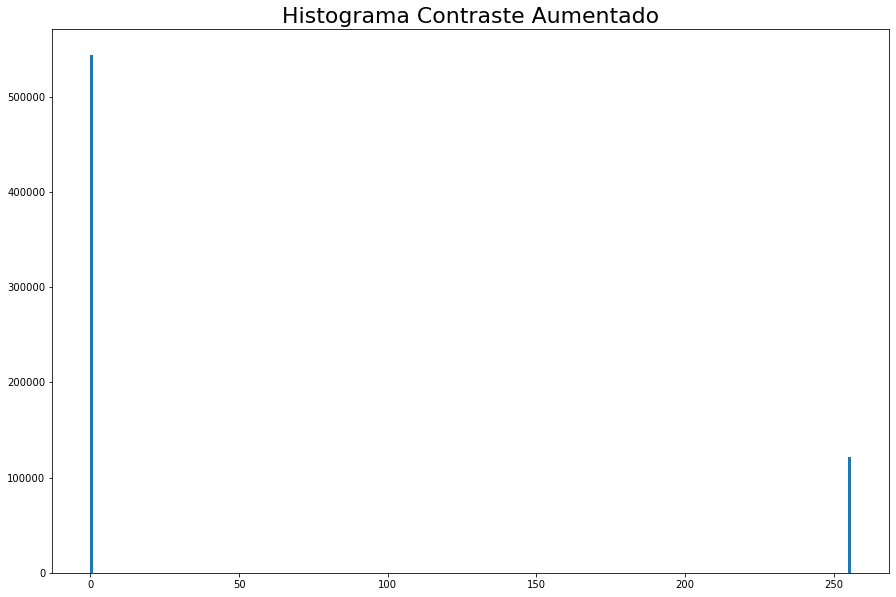

In [378]:
imprimeHistograma(imgpos,'Histograma Contraste Aumentado')

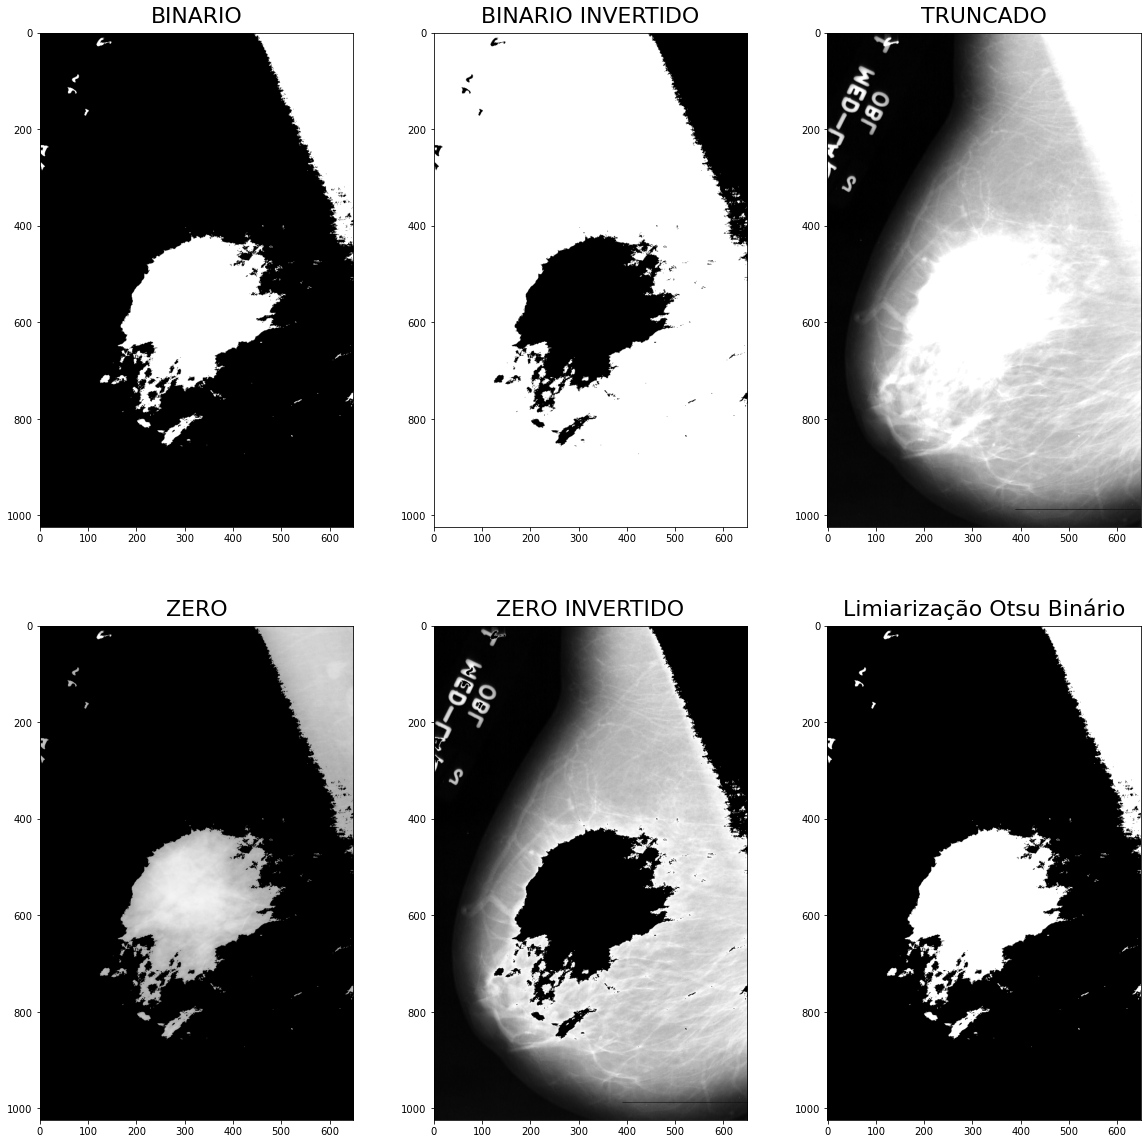

In [379]:
imprimir = []
titulos = []

media = 255 - int(aumentoContraste.mean())

ret,thresh1 = cv2.threshold(aumentoContraste, media,255,cv2.THRESH_BINARY)
imprimir.append(thresh1)

ret,thresh2 = cv2.threshold(aumentoContraste,media,255,cv2.THRESH_BINARY_INV)
imprimir.append(thresh2)

ret,thresh3 = cv2.threshold(aumentoContraste,media,255,cv2.THRESH_TRUNC)
imprimir.append(thresh3)

ret,thresh4 = cv2.threshold(aumentoContraste,media,255,cv2.THRESH_TOZERO)
imprimir.append(thresh4)

ret,thresh5 = cv2.threshold(aumentoContraste,media,255,cv2.THRESH_TOZERO_INV)
imprimir.append(thresh5)

aux,otsu = cv2.threshold(thresh1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imprimir.append(otsu)

titulos = ['BINARIO','BINARIO INVERTIDO','TRUNCADO','ZERO','ZERO INVERTIDO','Limiarização Otsu Binário']
imprimeImagemV(imprimir,titulos,(20,20),3,2)

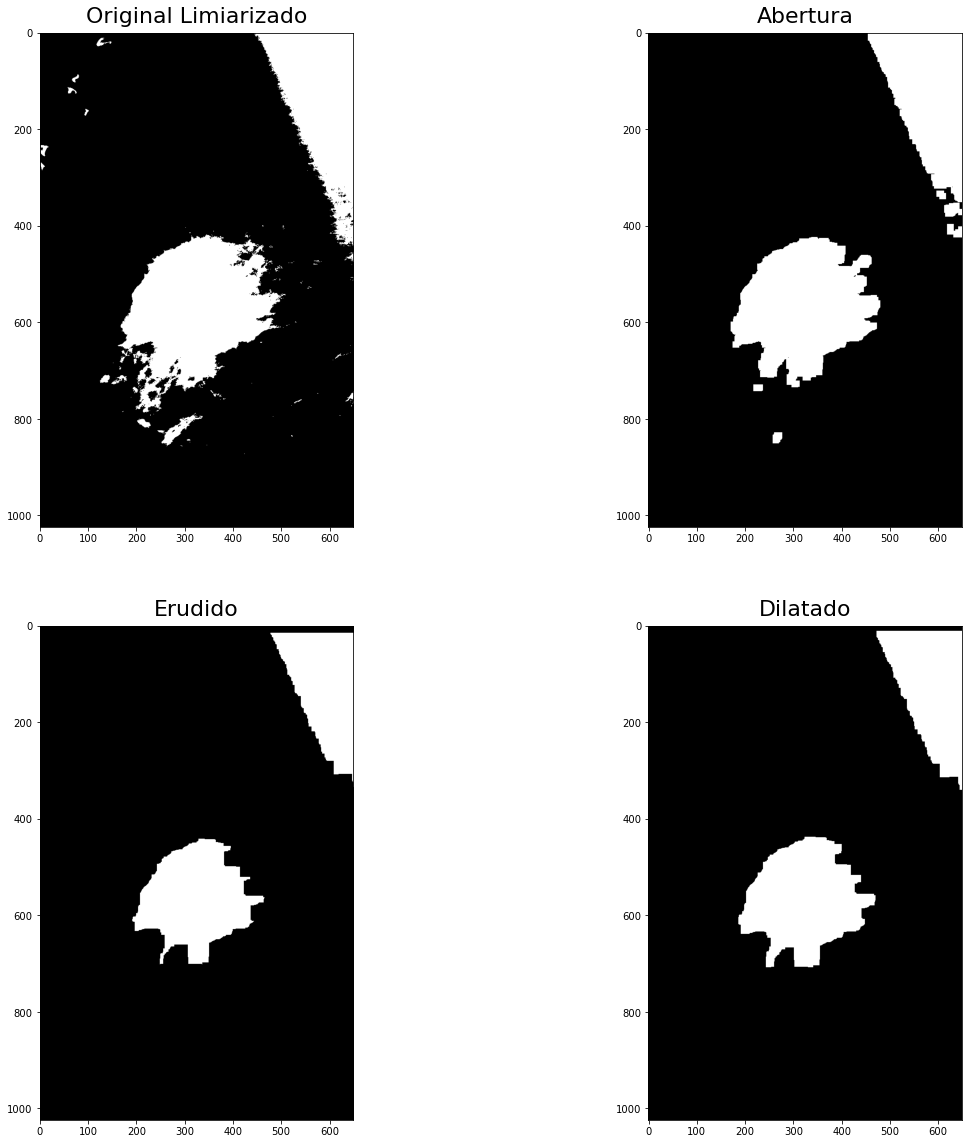

In [385]:
imprimir = []
titulos = []

imprimir.append(thresh1)

opening = abertura(thresh1,5,3)
imprimir.append(opening)

erudido = erosao(opening,10,3)
imprimir.append(erudido)

dilation = dilatacao(erudido,6,2)
imprimir.append(dilation)

titulos = ['Original Limiarizado','Abertura','Erudido','Dilatado']
imprimeImagemV(imprimir,titulos,(20,20),2,2)


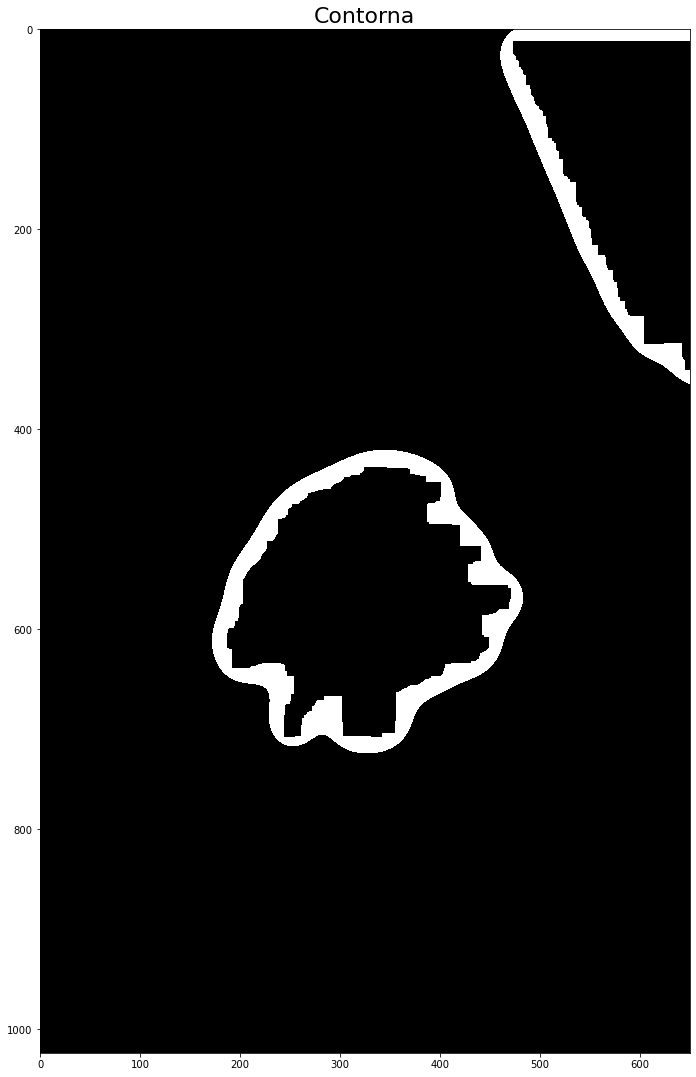

In [386]:
imgCircula = circula(dilation,101,30)
imprimeImagem(imgCircula,"Contorna")


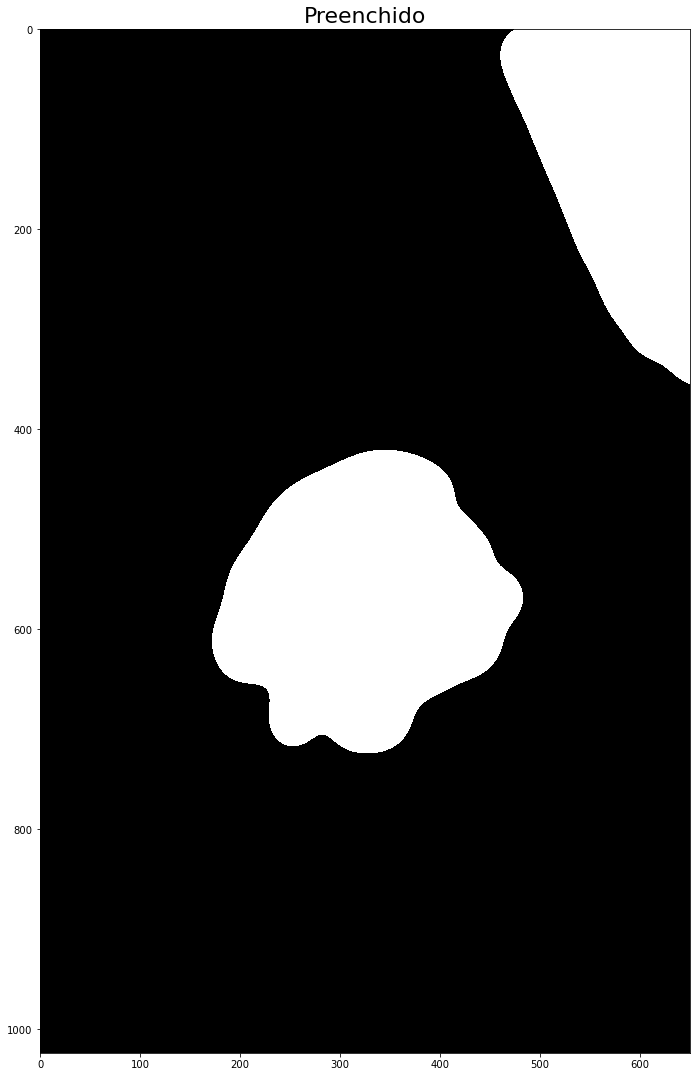

In [387]:
imgPreenchida = preenche(imgCircula,220)
imprimeImagem(imgPreenchida,'Preenchido')

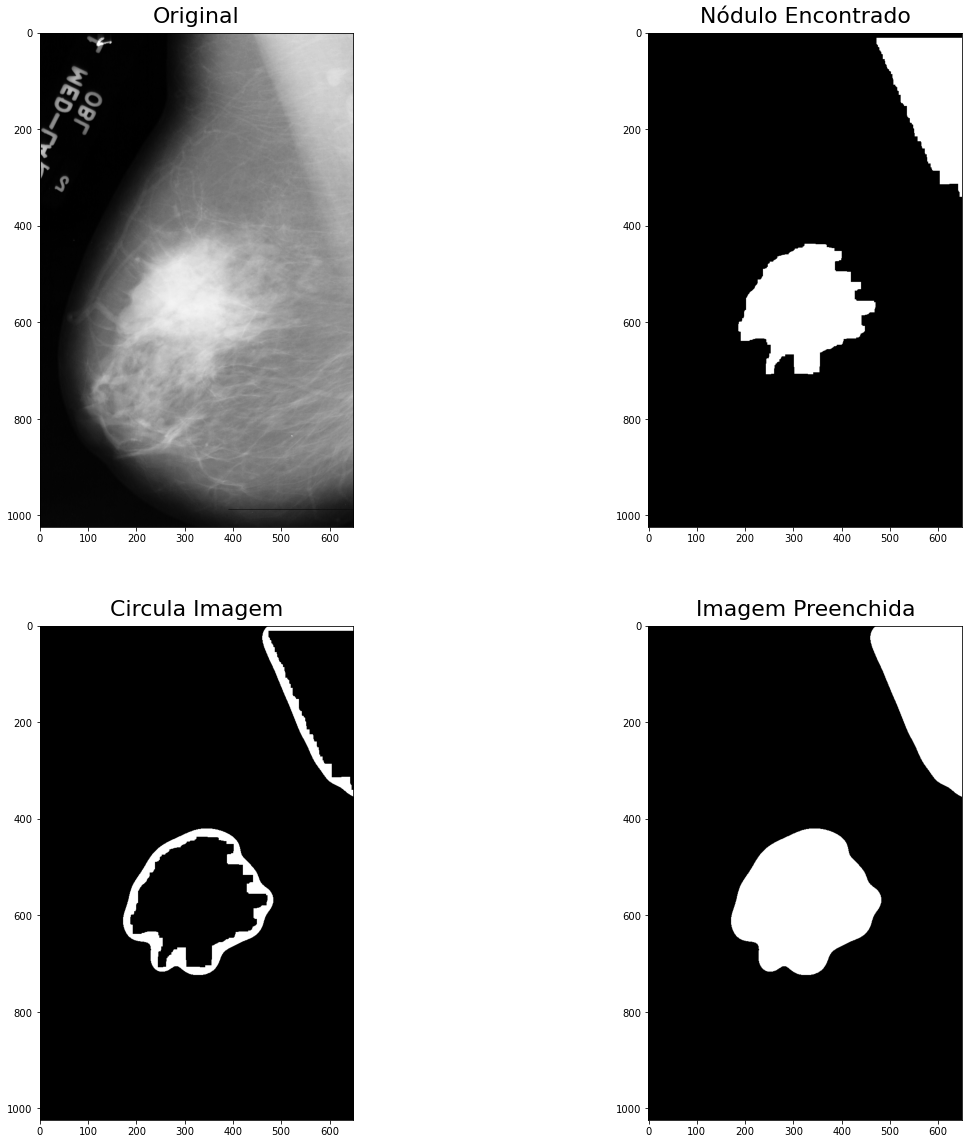

In [388]:
imprimir = []
titulos = []


imprimir.append(img)
imprimir.append(dilation)
imprimir.append(imgCircula)
imprimir.append(imgPreenchida)

titulos = ['Original','Nódulo Encontrado','Circula Imagem','Imagem Preenchida']
imprimeImagemV(imprimir,titulos,(20,20),2,2)

In [389]:
#Calculando tamanho dos nódulos com imagem dilatada e imagem preenchida 

aread = []
contorno = Listacontornos(dilation)

areac = []
contorno2 = Listacontornos(imgPreenchida)

for i in range(len(contorno)):
    aread.append(cv2.contourArea(contorno[i]))
    
for i in range(len(contorno2)):
    areac.append(cv2.contourArea(contorno2[i]))

for i in range(len(aread)):
    if aread[i] > 1000:
        minimo = aread[i]
        posicaoAux = i
        break
        
print('Tamanho do nódulo sobre Imagem Dilatada :',minimo)
print('Tamanho do nódulo sobre Imagem Preenchida:',min(areac))

Tamanho do nódulo sobre Imagem Dilatada : 46152.0
Tamanho do nódulo sobre Imagem Preenchida: 43607.5


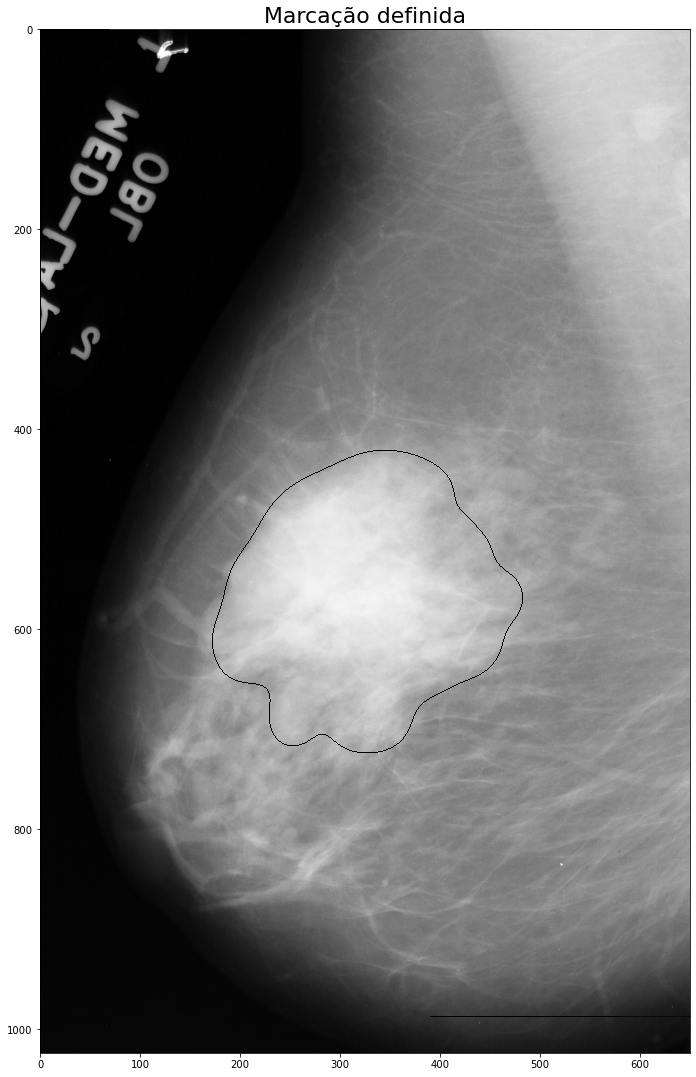

In [390]:
circuladoimg = img.copy()
pts = contorno2[0].reshape((-1,1,2))
circuladoimg = cv2.polylines(circuladoimg,[pts],True,(0,0,0))

imprimeImagem(circuladoimg,'Marcação definida')

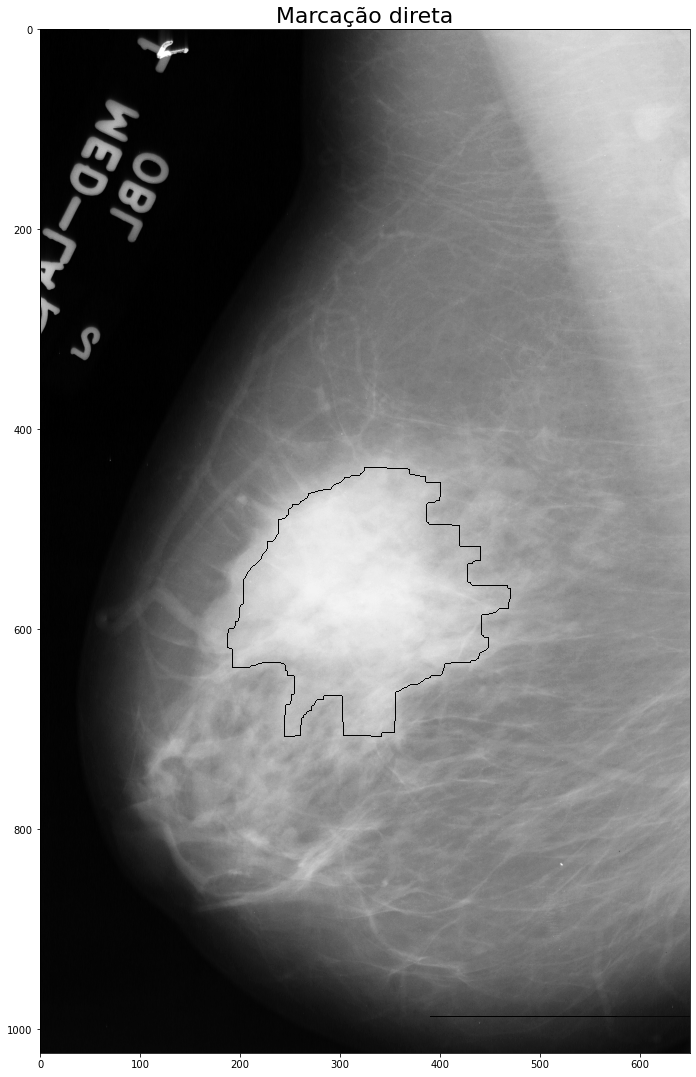

In [391]:
circuladoimg2 = img.copy()
pts = contorno[posicaoAux].reshape((-1,1,2))
circuladoimg2 = cv2.polylines(circuladoimg2,[pts],True,(0,0,0))

#sobre = imgCircula + img
imprimeImagem(circuladoimg2,'Marcação direta')

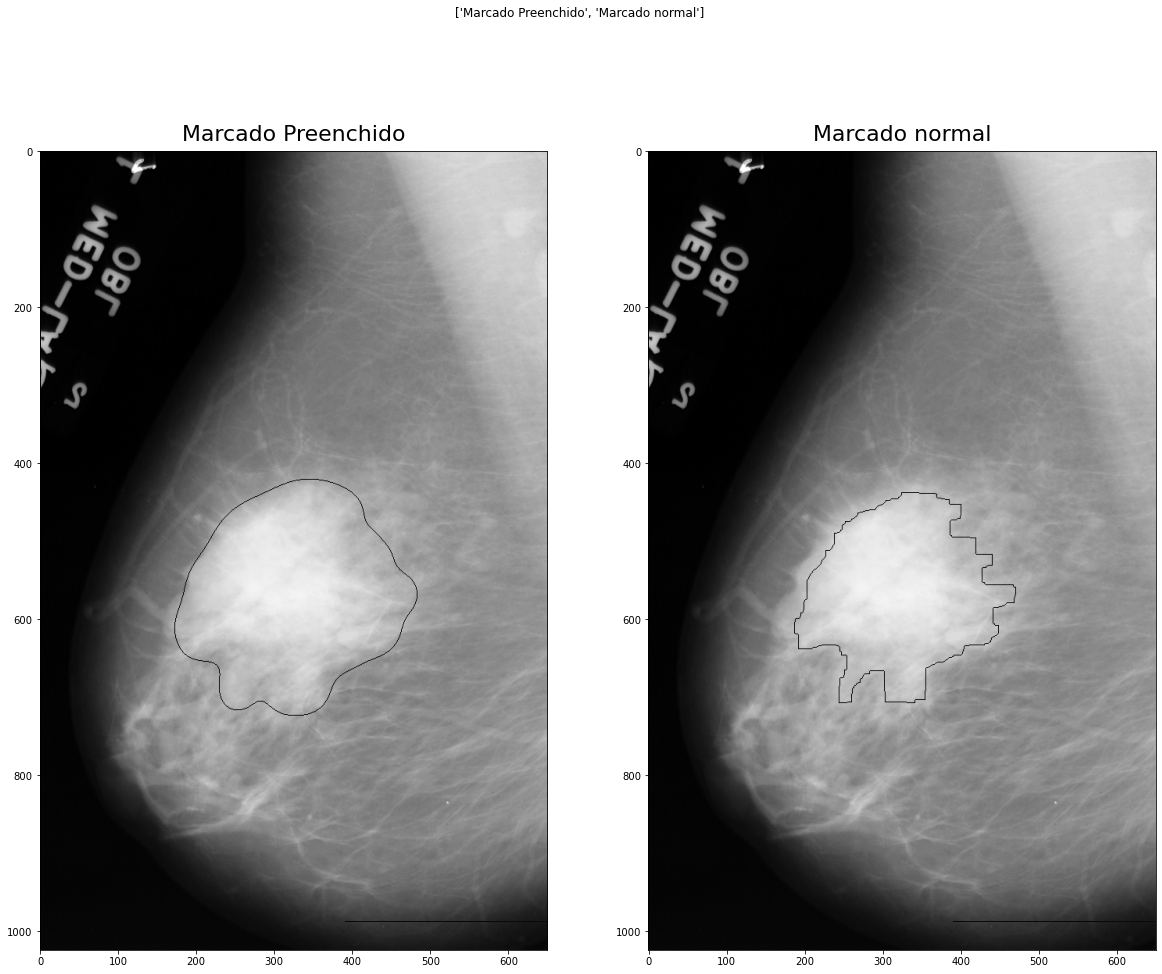

In [392]:
imprimir = []
titulos = []


imprimir.append(circuladoimg)
imprimir.append(circuladoimg2)

titulos = ['Marcado Preenchido','Marcado normal']
imprimeImagemV(imprimir,titulos,(20,20),2,1)

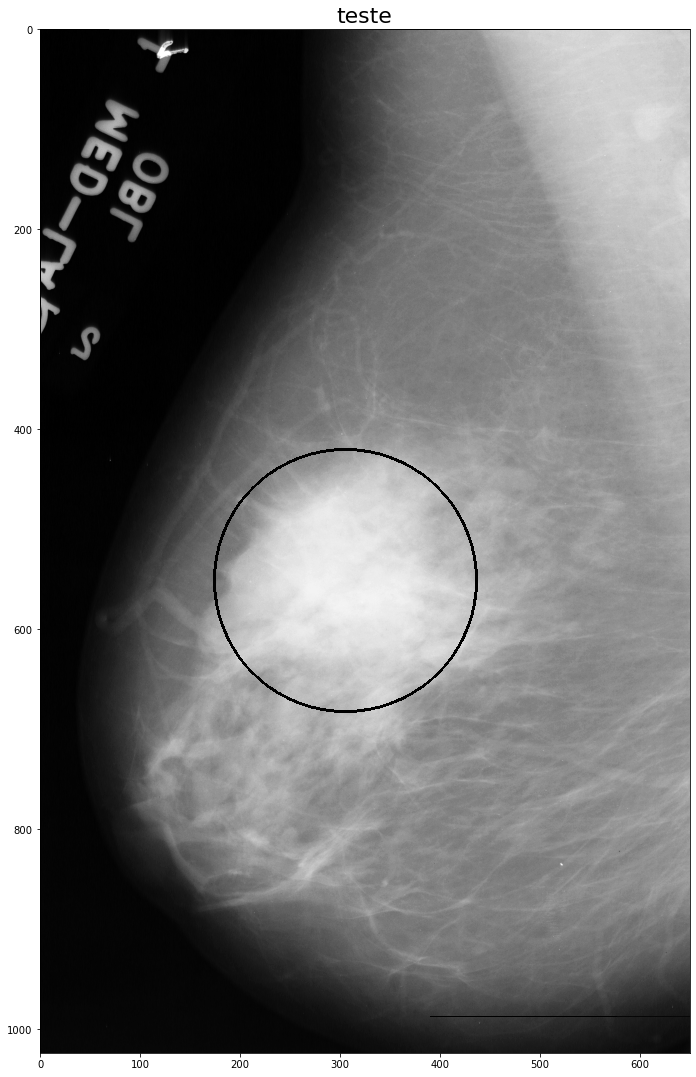

In [395]:
teste = img.copy()
teste = circulaNod(teste,131,492,473)
imprimeImagem(teste,'teste')